This is the project colab submission for CAI1C03 - it attempts to build a deep learning model for CIFAR-10 and is to be used over google colab.
This model builds on basic CNN blocks.
This a series of progress of continuously adding / mofidying the model to get from a basic accuracyo to improved accuracy 

The dataset can be retrieved from https://www.cs.toronto.edu/~kriz/cifar.html

This is **Model B - model building from resNet blocks**

Modified from machinelearningmastery.com & other sources


# START PREPROCESSING - GETTING DATA FROM GOOGLE DRIVE
Make sure the google drive has this setup <br/>
My Drive \ CAI1C03 \ data \ cifar-10-batches-py <br/>
cifar-10-batches-py is the directory that holds all the pickle files from
https://www.cs.toronto.edu/~kriz/cifar.html


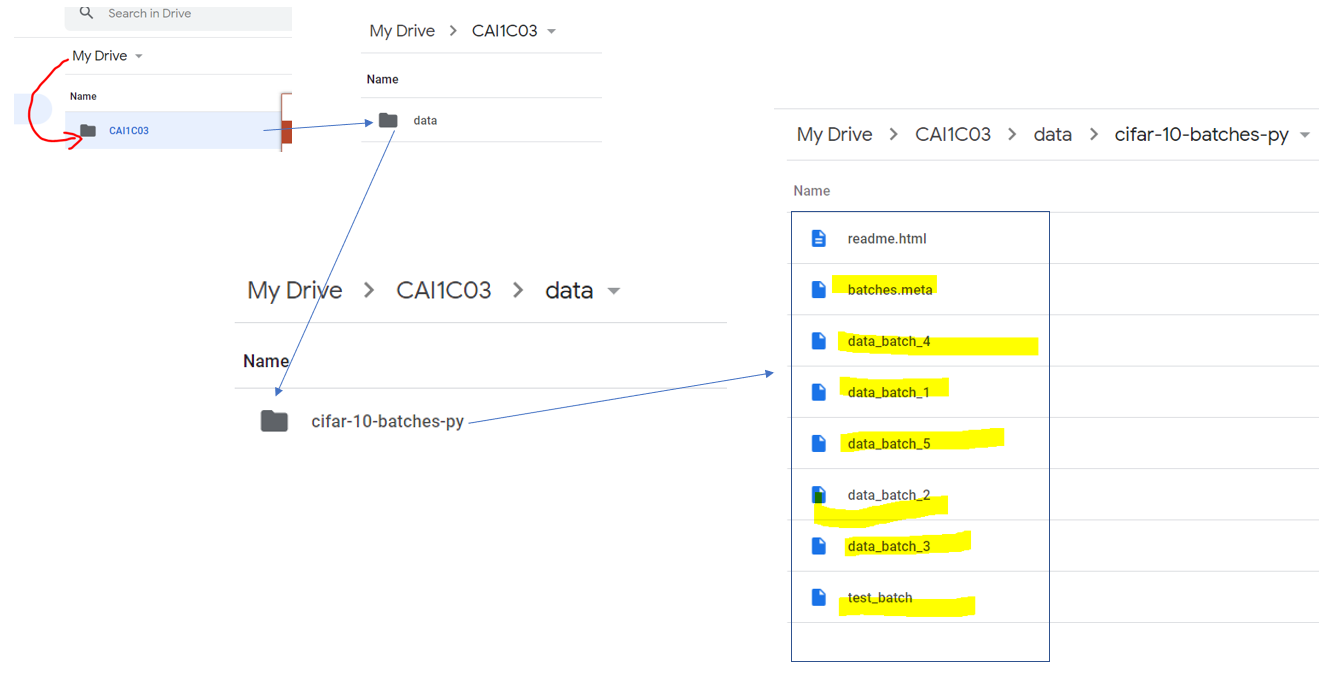

In [65]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
!ls "/content/drive/MyDrive/CAI1C03/data"

cifar-10-batches-py  data  XXX.txt


The following is a symbolic link from googledrive to virtual env. We will be storing our files in the virtual env.

In [67]:
!ln -s "/content/drive/MyDrive/CAI1C03/data" "/content/dataForProj"

ln: failed to create symbolic link '/content/dataForProj/data': File exists


In [68]:
!ls -al "/content/dataForProj"

lrwxrwxrwx 1 root root 35 Dec  4 08:29 /content/dataForProj -> /content/drive/MyDrive/CAI1C03/data


In [ ]:
#this folows articles from https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

In [69]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [70]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [71]:
cifar10_dataset_folder_path='/content/dataForProj/' + 'cifar-10-batches-py'

In [72]:
cifar10_dataset_folder_path

'/content/dataForProj/cifar-10-batches-py'

In [73]:
def load_cfar10_batch_noBatchID_trainingDataAfterNormalization (cifar10_dataset_folder_path):
    with open(cifar10_dataset_folder_path, mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [74]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [75]:
def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)
    
    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))
    
    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    
    print (label_counts)

    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))
    
    sample_image = features[sample_id]
    sample_label = labels[sample_id]
    
    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    
    plt.imshow(sample_image)


Stats of batch #3:
# of Samples: 10000

<class 'numpy.ndarray'>
<class 'list'>
{0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
Label Counts of [0](AIRPLANE) : 994
Label Counts of [1](AUTOMOBILE) : 1042
Label Counts of [2](BIRD) : 965
Label Counts of [3](CAT) : 997
Label Counts of [4](DEER) : 990
Label Counts of [5](DOG) : 1029
Label Counts of [6](FROG) : 978
Label Counts of [7](HORSE) : 1015
Label Counts of [8](SHIP) : 961
Label Counts of [9](TRUCK) : 1029

Example of Image 7000:
Image - Min Value: 24 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


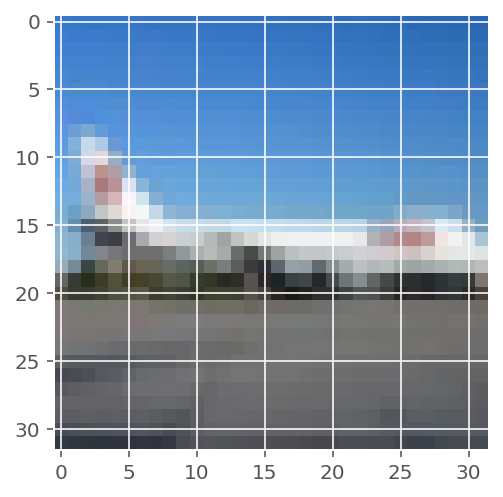

In [76]:
batch_id = 3 
sample_id = 7000 

features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)



print('\nStats of batch #{}:'.format(batch_id))
print('# of Samples: {}\n'.format(len(features)))

label_names = load_label_names()
label_counts = dict(zip(*np.unique(labels, return_counts=True)))
print (type(features))
print (type(labels))
print (label_counts)

for key, value in label_counts.items():
    print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))

sample_image = features[sample_id]
sample_label = labels[sample_id]

print('\nExample of Image {}:'.format(sample_id))
print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
print('Image - Shape: {}'.format(sample_image.shape))
print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))

plt.imshow(sample_image)


Stats of batch #3:
# of Samples: 10000

{0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
Label Counts of [0](AIRPLANE) : 994
Label Counts of [1](AUTOMOBILE) : 1042
Label Counts of [2](BIRD) : 965
Label Counts of [3](CAT) : 997
Label Counts of [4](DEER) : 990
Label Counts of [5](DOG) : 1029
Label Counts of [6](FROG) : 978
Label Counts of [7](HORSE) : 1015
Label Counts of [8](SHIP) : 961
Label Counts of [9](TRUCK) : 1029

Example of Image 7000:
Image - Min Value: 24 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


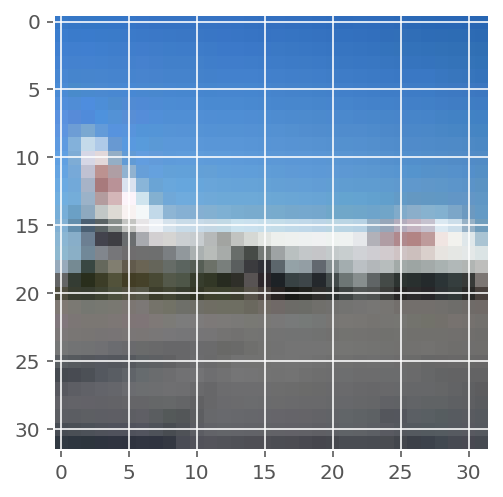

In [77]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Explore the dataset
batch_id = 3
sample_id = 7000
display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

In [ ]:
#Let's normalize those numbers

In [78]:
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    #min_val = np.min(x)
    #max_val = np.max(x)
    #x = (x-min_val) / (max_val-min_val)
    x = x / 255.0
    return x

In [79]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [80]:
def one_hot_encode(x):
    """
        argument
            - x: a list of labels
        return
            - one hot encoding matrix (number of labels, number of class)
    """
    encoded = np.zeros((len(x), 10))
    
    for idx, val in enumerate(x):
        encoded[idx][val] = 1
    
    return encoded

In [81]:
def _preprocess_and_save(normalize, one_hot_encode, features, labels, filename):
    features = normalize(features)
    labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))

In [82]:
def _preprocess_and_save_notHotEncode (normalize, features, labels, filename):
    features = normalize(features)
    #labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))

In [83]:

def preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode):
    n_batches = 5
    valid_features = []
    valid_labels = []
    print ( 'preprocess_and_save_data....' )

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
        
        # find index to be the point as validation data in the whole dataset of the batch (10%)
        index_of_validation = int(len(features) * 0.1)

        # preprocess the 90% of the whole dataset of the batch
        # - normalize the features
        # - one_hot_encode the lables
        # - save in a new file named, "preprocess_batch_" + batch_number
        # - each file for each batch
        print ( 'Type of Labels' , type (  labels[:-index_of_validation] ) )
        print ( 'Shape of Labels' , len(  labels[:-index_of_validation] ) )
        _preprocess_and_save(normalize, one_hot_encode,
                             features[:-index_of_validation], labels[:-index_of_validation], 
                             'preprocess_batch_' + str(batch_i) + '.p')

        # unlike the training dataset, validation dataset will be added through all batch dataset
        # - take 10% of the whold dataset of the batch
        # - add them into a list of
        #   - valid_features
        #   - valid_labels
        valid_features.extend(features[-index_of_validation:])
        valid_labels.extend(labels[-index_of_validation:])

    # preprocess the all stacked validation dataset
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(valid_features), np.array(valid_labels),
                         'preprocess_validation.p')

    # load the test dataset
    with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # preprocess the testing data
    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

    # Preprocess and Save all testing data
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(test_features), np.array(test_labels),
                         'preprocess_training.p')

In [ ]:
#preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

In [85]:
def preprocess_and_save_data_novalidation (cifar10_dataset_folder_path, normalize, one_hot_encodeParam ):
    n_batches = 5
    valid_features = []
    valid_labels = []

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
        
        # find index to be the point as validation data in the whole dataset of the batch (10%)
        #index_of_validation = int(len(features) * 0.1)

        # preprocess the 90% of the whole dataset of the batch
        # - normalize the features
        # - one_hot_encode the lables
        # - save in a new file named, "preprocess_batch_" + batch_number
        # - each file for each batch
        #_preprocess_and_save(normalize, one_hot_encode,
        #                     features, labels, 
        #                     'preprocess_batch_' + str(batch_i) + '.p')

        # unlike the training dataset, validation dataset will be added through all batch dataset
        # - take 10% of the whold dataset of the batch
        # - add them into a list of
        #   - valid_features
        #   - valid_labels
        #valid_features.extend(features[-index_of_validation:])
        #valid_labels.extend(labels[-index_of_validation:])
    
    print ('Summary status ')
    allTrainingFeatures = np.array([])
    allTrainingLabels =np.array([])
    appendedFeatures  = np.zeros((0, 32, 32, 3 ))
    appendedLabels =[]

    print (len(appendedFeatures), appendedFeatures.shape)
    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
        print ('in loop', type(features), len(features), features.ndim, features.shape)
        print ('in loop', type(labels), len(labels))
        #np.append(allTrainingFeatures, features )
        #np.append(allTrainingLabels, labels )
        #print ( features )
        #a=np.append(allTrainingFeatures, features)
        #a = np.concatenate(a, features)
        appendedFeatures = np.append(appendedFeatures , features, axis = 0) #append on the row-axis = 0 
        #print ( 'allTrainingFeatures len', len( allTrainingFeatures ))
        print ( 'appendedFeatures len', len( appendedFeatures ))
        #appendedLabels.append( np.array(appendedLabels) )
        #appendedLabels = appendedLabels.append( labels )

        appendedLabels.extend(labels) 
        #appendedLabels = np.append( appendedLabels , np.array(labels) , axis = 0) #append on the row-axis = 0 
        #arrLabels = np.array(labels)
 
        # displaying list
        #print ("List: ", lst)
 
        # displaying array
        print ("appendedLabels: ", len(appendedLabels) )

     
    print ( len( appendedFeatures )  , appendedFeatures.shape, appendedFeatures.ndim )
    print ( 'Length of labels after iteration' , len( appendedLabels ) )

    #uncomment afterwards
    if ( bool(one_hot_encodeParam)):
        _preprocess_and_save(normalize, one_hot_encode,
                             appendedFeatures, np.array(appendedLabels) , 
                             'preprocess_batch_train_full_ONE.p')
    else:
        _preprocess_and_save_notHotEncode  (normalize,
                             appendedFeatures, np.array(appendedLabels) , 
                             'preprocess_batch_train_full_noONE.p') 
    
    #_preprocess_and_save(normalize, one_hot_encode,
    #                         appendedFeatures, np.array(appendedLabels) , 
    #                         'preprocess_batch_train_full.p')


    # load the test dataset
    with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # preprocess the testing data
    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

    # Preprocess and Save all testing data
    #_preprocess_and_save(normalize, one_hot_encode,
    #                     np.array(test_features), np.array(test_labels),
    #                     'preprocess_test.p')
    #_preprocess_and_save_notHotEncode (normalize,
    #                    np.array(test_features), np.array(test_labels),
    #                    'preprocess_test.p')


    if ( bool(one_hot_encodeParam)):
        _preprocess_and_save(normalize, one_hot_encode,
                             np.array(test_features), np.array(test_labels), 
                             'preprocess_test_ONE.p')
    else:
        _preprocess_and_save_notHotEncode  (normalize,
                             np.array(test_features), np.array(test_labels), 
                             'preprocess_test_noONE.p')
                             
    print ('Dump to pickle file completed ')                   

In [86]:
#option not to one-HOT-encode the y in the pickle file instead 
preprocess_and_save_data_novalidation(cifar10_dataset_folder_path, normalize, False)
#shape expected, 50000, 32, 32, 3 

Summary status 
0 (0, 32, 32, 3)
in loop <class 'numpy.ndarray'> 10000 4 (10000, 32, 32, 3)
in loop <class 'list'> 10000
appendedFeatures len 10000
appendedLabels:  10000
in loop <class 'numpy.ndarray'> 10000 4 (10000, 32, 32, 3)
in loop <class 'list'> 10000
appendedFeatures len 20000
appendedLabels:  20000
in loop <class 'numpy.ndarray'> 10000 4 (10000, 32, 32, 3)
in loop <class 'list'> 10000
appendedFeatures len 30000
appendedLabels:  30000
in loop <class 'numpy.ndarray'> 10000 4 (10000, 32, 32, 3)
in loop <class 'list'> 10000
appendedFeatures len 40000
appendedLabels:  40000
in loop <class 'numpy.ndarray'> 10000 4 (10000, 32, 32, 3)
in loop <class 'list'> 10000
appendedFeatures len 50000
appendedLabels:  50000
50000 (50000, 32, 32, 3) 4
Length of labels after iteration 50000
Dump to pickle file completed 


# END START PREPROCESSING - GETTING DATA FROM GOOGLE DRIVE

# START CHECKPOINT FOR PREPROCESSED PRICKLE FILE

In [ ]:
#test Pickle for NON-ONE dump - For TESTING , expected to get 10000

In [87]:
pathTesting = 'preprocess_test_noONE.p'
test_features, test_labels = pickle.load(open( pathTesting , mode='rb')) 
print ( 'test features = ' , type(test_features) , ';shape test labels --> ',test_features.shape ) 
print ( 'test labels = ' , type(test_labels) , ';len(test labels) --> ', len(test_labels) ) 
print ( 'Peek into 1 label-->', test_labels [166])

test features =  <class 'numpy.ndarray'> ;shape test labels -->  (10000, 32, 32, 3)
test labels =  <class 'numpy.ndarray'> ;len(test labels) -->  10000
Peek into 1 label--> 8


In [ ]:
#test Pickle for NON-ONE dump - For TRAINING , expected to get 50000

In [88]:
pathTraining = 'preprocess_batch_train_full_noONE.p'
train_features, train_labels = pickle.load(open('preprocess_batch_train_full_noONE.p', mode='rb')) 
print ( 'train features = ' , type(train_features) , ';shape train labels --> ',train_features.shape ) 
print ( 'train labels = ' , type(train_labels) , ';len(train labels) --> ', len(train_labels) ) 
print ( 'Peek into 1 train label-->', train_labels [166])

train features =  <class 'numpy.ndarray'> ;shape train labels -->  (50000, 32, 32, 3)
train labels =  <class 'numpy.ndarray'> ;len(train labels) -->  50000
Peek into 1 train label--> 9


# END TESTING OF PREPROCESSED PICKLE FILE

# START transform these into numpy arrays to work

In [ ]:
# transform these into numpy arrays to work 


In [89]:
trainX = train_features 
trainy = np.array(train_labels)
testX = test_features
testy = np.array(test_labels)

In [26]:
# If running in local in anaconda , set RUN_LOCAL=TRUE
RUN_LOCAL_MODE = False 
if RUN_LOCAL_MODE == True :
    from keras.datasets import cifar10
    # load dataset
    print ('Local mode--loading from keras directly')
    (trainX, trainy), (testX, testy) = cifar10.load_data()
    trainX = trainX / 255 
    testX = testX / 255 
    # summarize loaded dataset

In [90]:
#expected 50000, 10000
len(trainX) , len(testX)

(50000, 10000)

In [91]:
#expected 50000, 10000
len(trainy), len (testy)

(50000, 10000)

In [92]:
#this should not be one-hot-encoded!
testy[800]

7

In [93]:
#this should not be one-hot-encoded!
trainy[800]

2

# END transform these into numpy arrays to work

By now we have normalized X > X/255 <br/>

Herer follows Jason Lee's approach to loading the dataset 

In [94]:
from matplotlib import pyplot
import tensorflow as tf
print(tf.__version__)

import keras
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, Dropout

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


from datetime import datetime
import time

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')


2.7.0


Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)


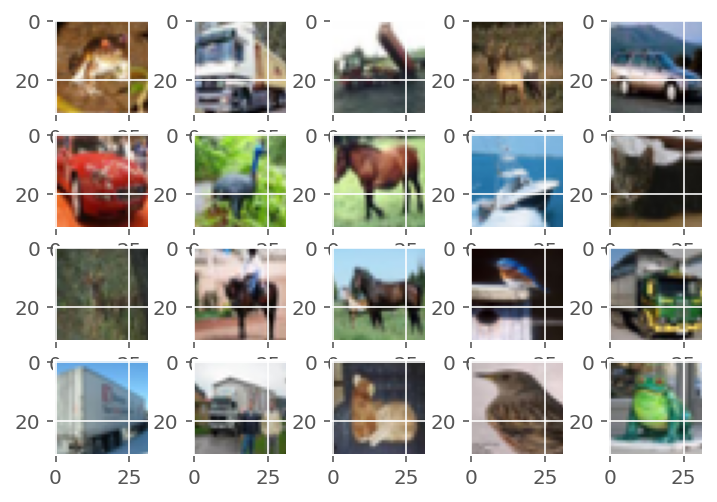

In [95]:
# example of loading the cifar10 dataset
# from matplotlib import pyplot
#from keras.datasets import cifar10
# load dataset
#(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
n_rows = 4 
n_columns = 5

for i in range( n_rows * n_columns ):
    # Plot with n row and n columns and current plot being drawn is (i+1)
    plt.subplot(n_rows,n_columns,i+1)
    plt.imshow(trainX[i])
plt.show()

In [ ]:
#trainy

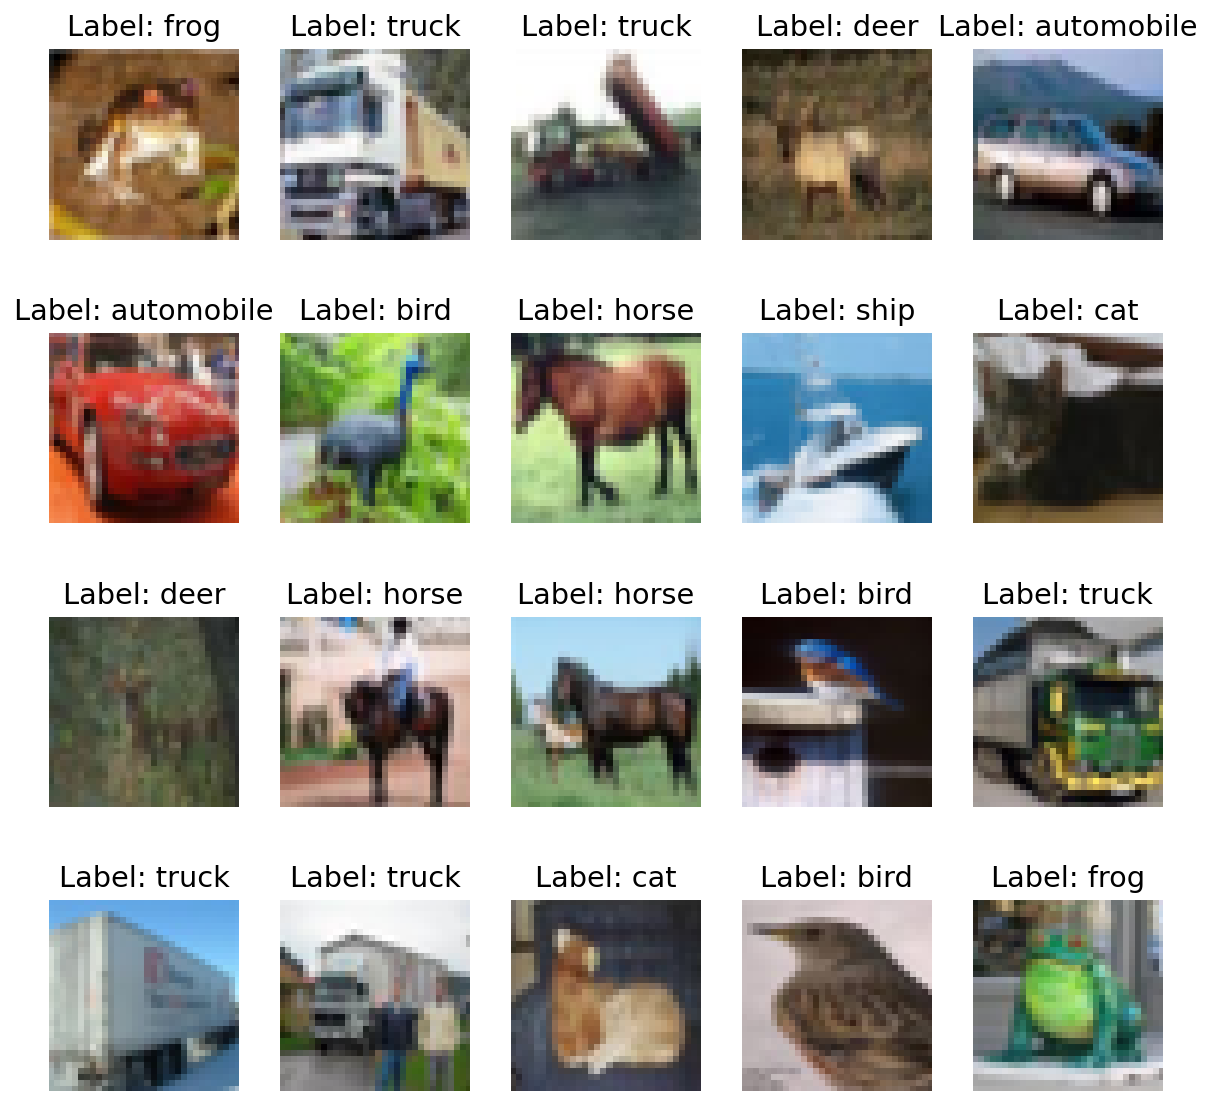

In [96]:
# adopted from : 
# https://www.binarystudy.com/2021/09/how-to-load-preprocess-visualize-CIFAR-10-and-CIFAR-100.html
# printing the label with the subplot 
# define figure
fig=plt.figure(figsize=(10, 10))

n_rows = 4 
n_columns = 5

# visualize these random images
for i in range(1, n_columns*n_rows +1):
    fig.add_subplot(n_rows, n_columns, i)
    #plt.imshow(images[i-1])
    plt.imshow(trainX[i-1])
    plt.xticks([])
    plt.yticks([])
    plt.title("Label: {}".format(label_names[trainy[i-1]]))
plt.show()

### Distribution of different classes in [training]

Text(0.5, 1.0, 'Class distribution in training set')

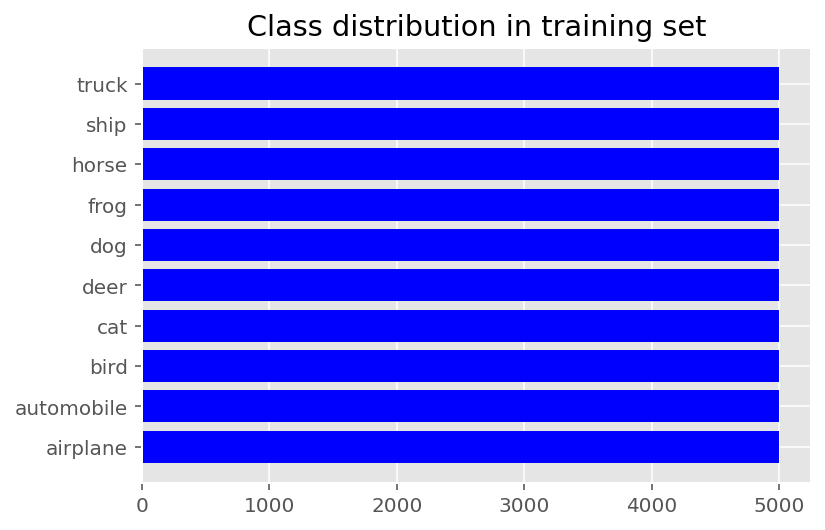

In [97]:
#print out the distribution for training set
classes, counts = np.unique(trainy, return_counts=True)
plt.barh(load_label_names(), counts, color='blue')
plt.title('Class distribution in training set')

We see that every class has 5000 (uniform) in training set - this is fine.

### Distribution of different classes in [testing set]

Text(0.5, 1.0, 'Class distribution in testing set')

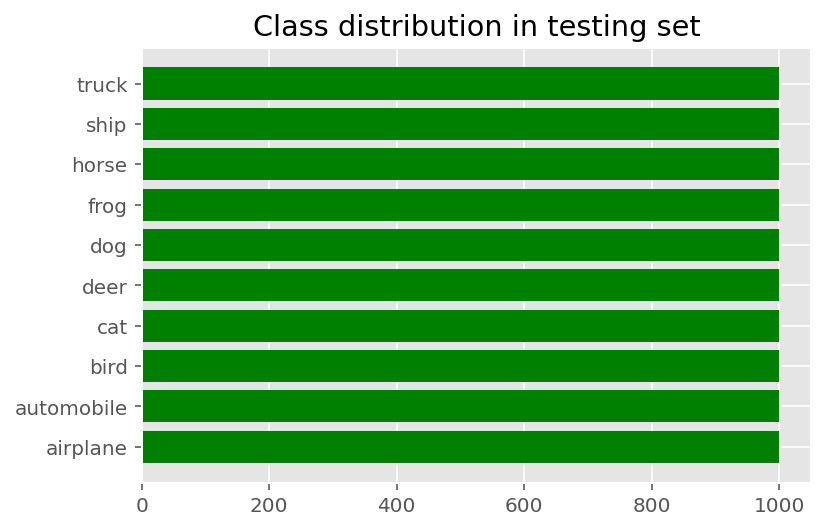

In [98]:
classes, counts = np.unique(testy, return_counts=True)
plt.barh(load_label_names(), counts, color='green')
plt.title('Class distribution in testing set')

We see that every class has 1000 (uniform) in testing set - this is fine.

In [99]:
def prep_pixelsAsFloat32 (train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    #train_norm = train_norm / 255.0
    #test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [100]:
( trainX, testX ) = prep_pixelsAsFloat32 ( trainX, testX )

In [101]:
# load train and test dataset
def convertToCategorial (trainY1, testY1 ):
    # load dataset
    #(trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    #trainY = keras.utils.np_utils.to_categorical (trainY1)
    #testY = keras.utils.np_utils.to_categorical (testY1)
    return ( keras.utils.np_utils.to_categorical (trainY1) , keras.utils.np_utils.to_categorical (testY1)  )

In [102]:
#trainy = keras.utils.np_utils.to_categorical (trainy)
#testy = keras.utils.np_utils.to_categorical (testy)

trainy , testy = convertToCategorial ( trainy, testy )


In [103]:
#they should be one hot encoded
trainy[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [104]:
#they should be one hot encoded
testy[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [105]:
len(trainy)

50000

In [106]:
len(testy)

10000

In [107]:
print ( trainy.shape)

(50000, 10)


In [108]:
print ( testy.shape)

(10000, 10)


# END transform these into numpy arrays to work 

## Start Building simple Resnet
## Model.001 - ResNet module
## Referencing : https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/

REFERENCE02: https://towardsdatascience.com/building-a-resnet-in-keras-e8f1322a49ba

In [109]:
def summarize_diagnostics_02 (model_log, filename1):
    
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

    ax1.plot(model_log.history['accuracy'])
    ax1.plot(model_log.history['val_accuracy'])
    ax1.set_title('Accuracy (Higher Better)')
    ax1.set(xlabel='Epoch', ylabel='Accuracy')
    ax1.legend(['train', 'validation'], loc='lower right')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

    ax2.plot(model_log.history['loss'])
    ax2.plot(model_log.history['val_loss'])
    ax2.set_title('Loss (Lower Better)')
    ax2.set(xlabel='Epoch', ylabel='Loss')
    ax2.legend(['train', 'validation'], loc='upper right')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

In [110]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model

In [111]:
def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

In [112]:
def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor:
    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2),
               filters=filters,
               padding="same")(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)
    #if downsample, we ave to add a 1x1 convodlution , stride 2 so that the output dimension is the same 
    
    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out

In [ ]:
def model_create_res_net():
    
    inputs = Input(shape=(32, 32, 3))
    num_filters = 64
    
    t = BatchNormalization()(inputs)
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)
    
    num_blocks_list = [2, 5, 5, 2]
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2
    
    t = AveragePooling2D(4)(t)
    t = Flatten()(t)
    outputs = Dense(10, activation='softmax')(t)
    
    model = Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
model = model_create_res_net()

In [ ]:
print (model.summary() ) 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 3)   12          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   1792        ['batch_normalization[0][0]']    
                                                                                                  
 re_lu (ReLU)                   (None, 32, 32, 64)   0           ['conv2d[0][0]']             

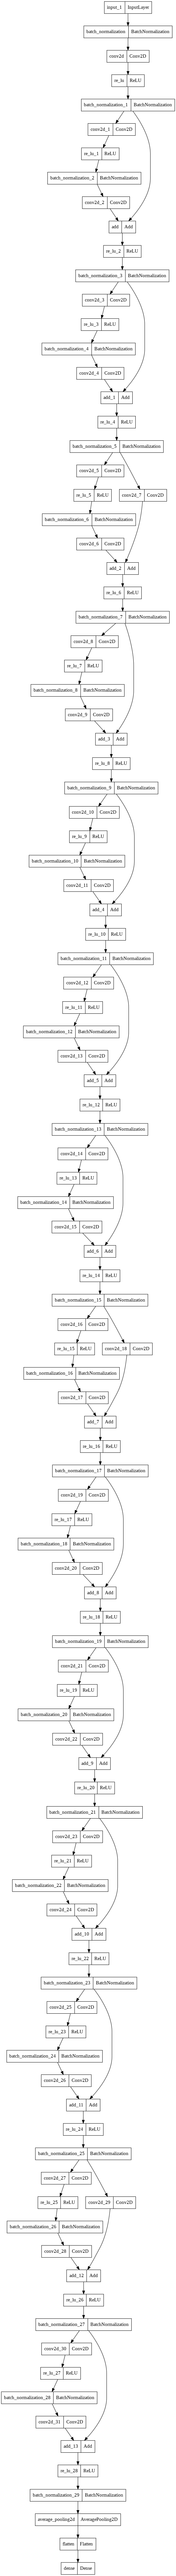

In [ ]:
import time
today = time.strftime("%Y%m%d")
modelfile = today +'_modelB_firstModel.png'
tf.keras.utils.plot_model(
    model, to_file=modelfile, show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

Epoch 1/30
500/500 [==============================] - 167s 304ms/step - loss: 1.4649 - accuracy: 0.4741 - val_loss: 1.6237 - val_accuracy: 0.5295
Epoch 2/30
500/500 [==============================] - 150s 299ms/step - loss: 0.9874 - accuracy: 0.6561 - val_loss: 1.0660 - val_accuracy: 0.6698
Epoch 3/30
500/500 [==============================] - 149s 299ms/step - loss: 0.7732 - accuracy: 0.7315 - val_loss: 0.9126 - val_accuracy: 0.7163
Epoch 4/30
500/500 [==============================] - 149s 299ms/step - loss: 0.6432 - accuracy: 0.7812 - val_loss: 0.8123 - val_accuracy: 0.7389
Epoch 5/30
500/500 [==============================] - 151s 302ms/step - loss: 0.5423 - accuracy: 0.8139 - val_loss: 0.6397 - val_accuracy: 0.7918
Epoch 6/30
500/500 [==============================] - 149s 299ms/step - loss: 0.4625 - accuracy: 0.8425 - val_loss: 0.6215 - val_accuracy: 0.7990
Epoch 7/30
500/500 [==============================] - 149s 298ms/step - loss: 0.3945 - accuracy: 0.8631 - val_loss: 0.6149 -

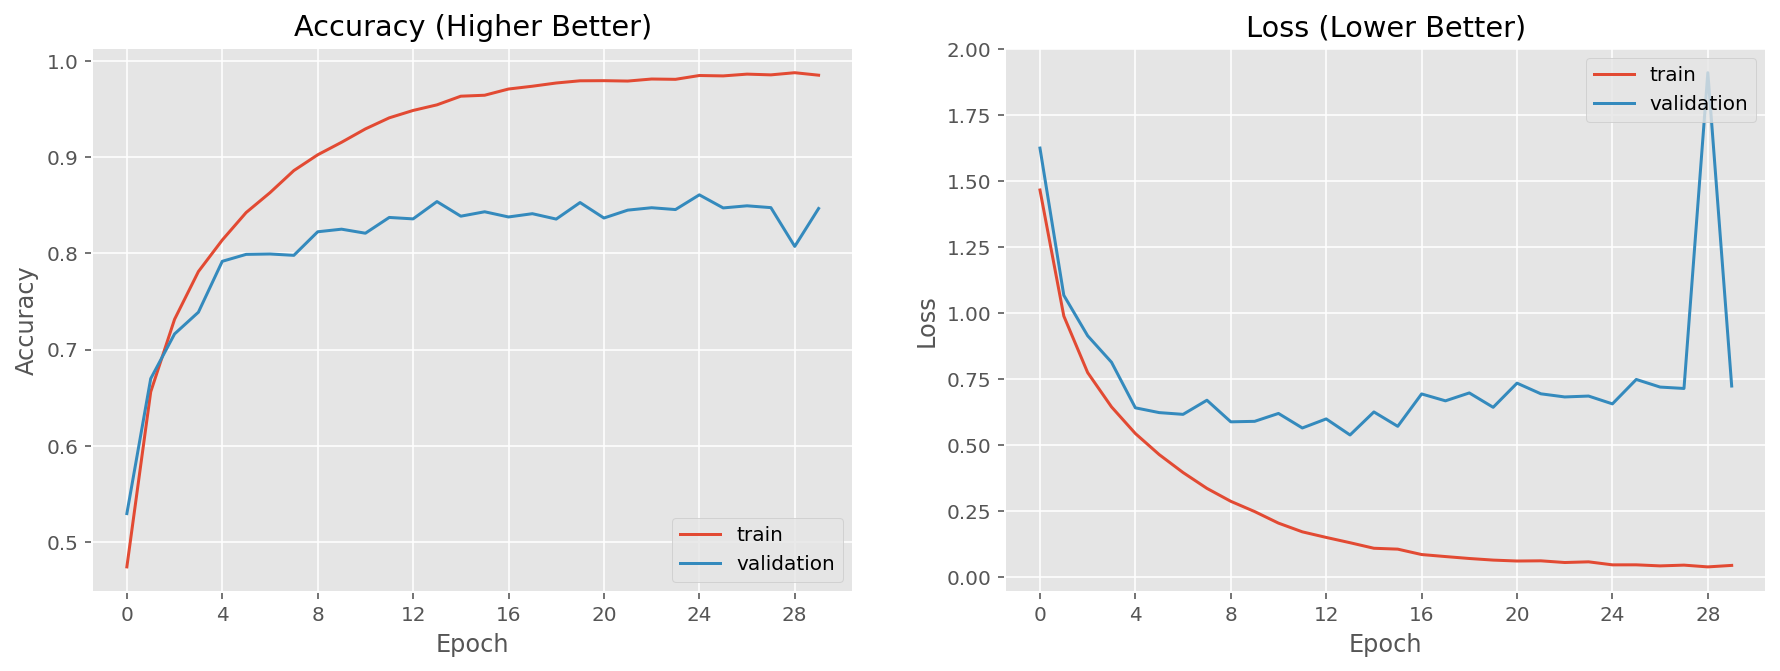

In [ ]:
import time
start = time.time()

# fit model
history = model.fit(trainX, trainy, epochs=30, batch_size=100, validation_data=(testX, testy), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))
end = time.time()
print('Time Taken = ', (end - start) )

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

In [ ]:
import time
today = time.strftime("%Y%m%d")
filename='modelB_temp' + today + '_initalModelB.h5' 

model.save(filename)
print("Saved model to disk")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk


In [ ]:
def model_create_res_netv02():
    
    inputs = Input(shape=(32, 32, 3))
    num_filters = 32
    
    t = BatchNormalization()(inputs)
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)
    
    num_blocks_list = [2, 2]
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2
    
    t = AveragePooling2D(4)(t)
    t = Flatten()(t)
    outputs = Dense(10, activation='softmax')(t)
    
    model = Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
print ('Try out 2 resBlocks only ')
model = model_create_res_netv02()

print (model.summary() )

Try out 2 resBlocks only 
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization_30 (BatchN  (None, 32, 32, 3)   12          ['input_2[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv2d_32 (Conv2D)             (None, 32, 32, 32)   896         ['batch_normalization_30[0][0]'] 
                                                                                                  
 re_lu_29 (ReLU)                (None, 32, 32, 32)   0           [

Try out 2 resBlocks only...
Epoch 1/30
500/500 [==============================] - 49s 76ms/step - loss: 1.1285 - accuracy: 0.5987 - val_loss: 0.8947 - val_accuracy: 0.6793
Epoch 2/30
500/500 [==============================] - 37s 74ms/step - loss: 0.7460 - accuracy: 0.7370 - val_loss: 0.7455 - val_accuracy: 0.7483
Epoch 3/30
500/500 [==============================] - 37s 73ms/step - loss: 0.6025 - accuracy: 0.7884 - val_loss: 0.7090 - val_accuracy: 0.7619
Epoch 4/30
500/500 [==============================] - 37s 74ms/step - loss: 0.5098 - accuracy: 0.8233 - val_loss: 0.6072 - val_accuracy: 0.7937
Epoch 5/30
500/500 [==============================] - 36s 73ms/step - loss: 0.4333 - accuracy: 0.8515 - val_loss: 0.5973 - val_accuracy: 0.7995
Epoch 6/30
500/500 [==============================] - 37s 75ms/step - loss: 0.3699 - accuracy: 0.8732 - val_loss: 0.6018 - val_accuracy: 0.8021
Epoch 7/30
500/500 [==============================] - 37s 75ms/step - loss: 0.3188 - accuracy: 0.8906 - val_

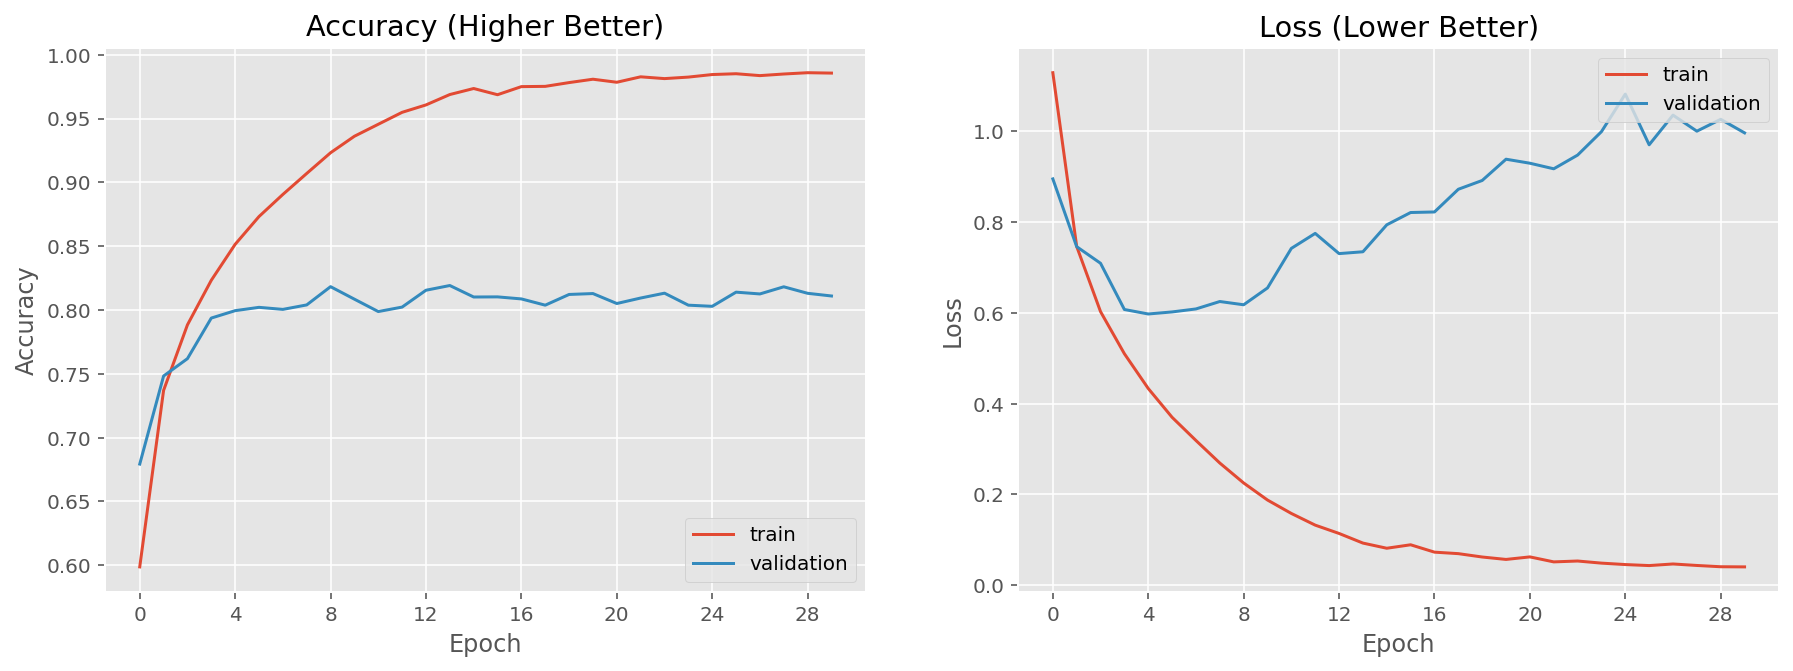

In [ ]:
print('Try out 2 resBlocks only...')
import time
start = time.time()


# fit model
history = model.fit(trainX, trainy, epochs=30, batch_size=100, validation_data=(testX, testy), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))
end = time.time()
print('Time Taken = ', (end - start) )

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

nowTimeStampYYYYMMDD: 20211127_033532


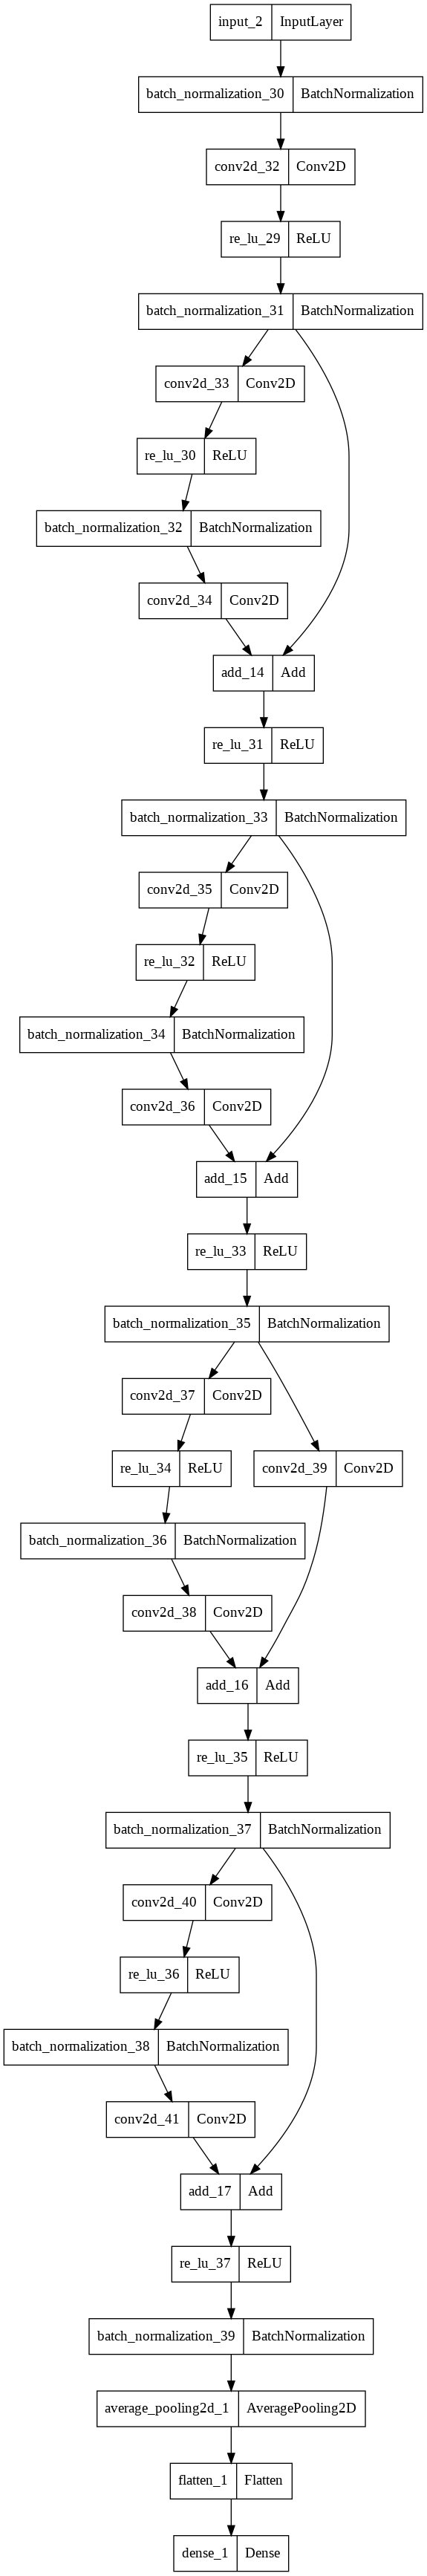

In [ ]:
now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)


modelfile = nowTimeStampYYYYMMDD+ '_testmodel_res002.png'
tf.keras.utils.plot_model(
    model, to_file=modelfile, show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

In [113]:
def residual_block_withDropout(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3, dropoutFactor: float=0.2 ) -> Tensor:
    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2),
               filters=filters,
               padding="same")(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)
    #if downsample, we ave to add a 1x1 convodlution , stride 2 so that the output dimension is the same 
    
    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])

    out = keras.layers.Dropout(rate=dropoutFactor) (out)

    out = relu_bn(out)
    return out

In [ ]:
def model_create_res_netv03Dropout():
    
    inputs = Input(shape=(32, 32, 3))
    num_filters = 32
    
    t = BatchNormalization()(inputs)
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)
    
    num_blocks_list = [2, 2]
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block_withDropout(t, downsample=(j==0 and i!=0), filters=num_filters, dropoutFactor=0.2)
        num_filters *= 2
    
    t = AveragePooling2D(4)(t)
    t = Flatten()(t)


    outputs = Dense(10, activation='softmax')(t)
    
    model = Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
model = model_create_res_netv03Dropout()
print (model.summary() ) 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 3)   12          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   896         ['batch_normalization[0][0]']    
                                                                                                  
 re_lu (ReLU)                   (None, 32, 32, 32)   0           ['conv2d[0][0]']             

Try out 2 resBlocks only with Dropout=0.2 within the resBlocks...
Epoch 1/30
500/500 [==============================] - 42s 80ms/step - loss: 1.2473 - accuracy: 0.5554 - val_loss: 1.0050 - val_accuracy: 0.6496
Epoch 2/30
500/500 [==============================] - 40s 79ms/step - loss: 0.8358 - accuracy: 0.7066 - val_loss: 0.7673 - val_accuracy: 0.7338
Epoch 3/30
500/500 [==============================] - 39s 78ms/step - loss: 0.7006 - accuracy: 0.7566 - val_loss: 0.6782 - val_accuracy: 0.7642
Epoch 4/30
500/500 [==============================] - 40s 79ms/step - loss: 0.6108 - accuracy: 0.7882 - val_loss: 0.6472 - val_accuracy: 0.7736
Epoch 5/30
500/500 [==============================] - 39s 78ms/step - loss: 0.5464 - accuracy: 0.8089 - val_loss: 0.6156 - val_accuracy: 0.7885
Epoch 6/30
500/500 [==============================] - 39s 78ms/step - loss: 0.4997 - accuracy: 0.8261 - val_loss: 0.5581 - val_accuracy: 0.8077
Epoch 7/30
500/500 [==============================] - 39s 78ms/step - 

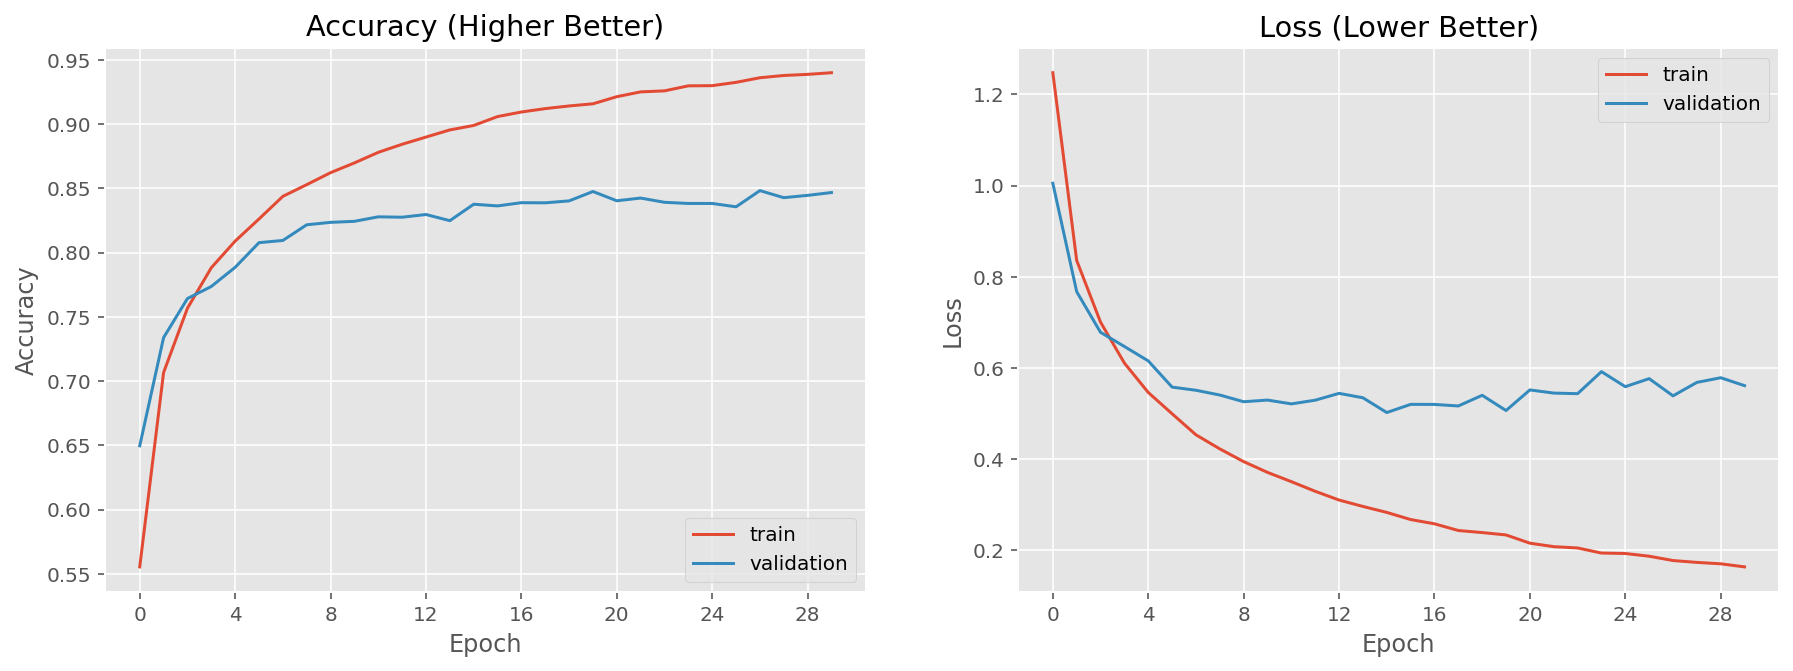

In [ ]:
print('Try out 2 resBlocks only with Dropout=0.2 within the resBlocks...')
import time
start = time.time()

# fit model
history = model.fit(trainX, trainy, epochs=30, batch_size=100, validation_data=(testX, testy), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))
end = time.time()
print('Time Taken = ', (end - start) )

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

nowTimeStampYYYYMMDD: 20211127_040347


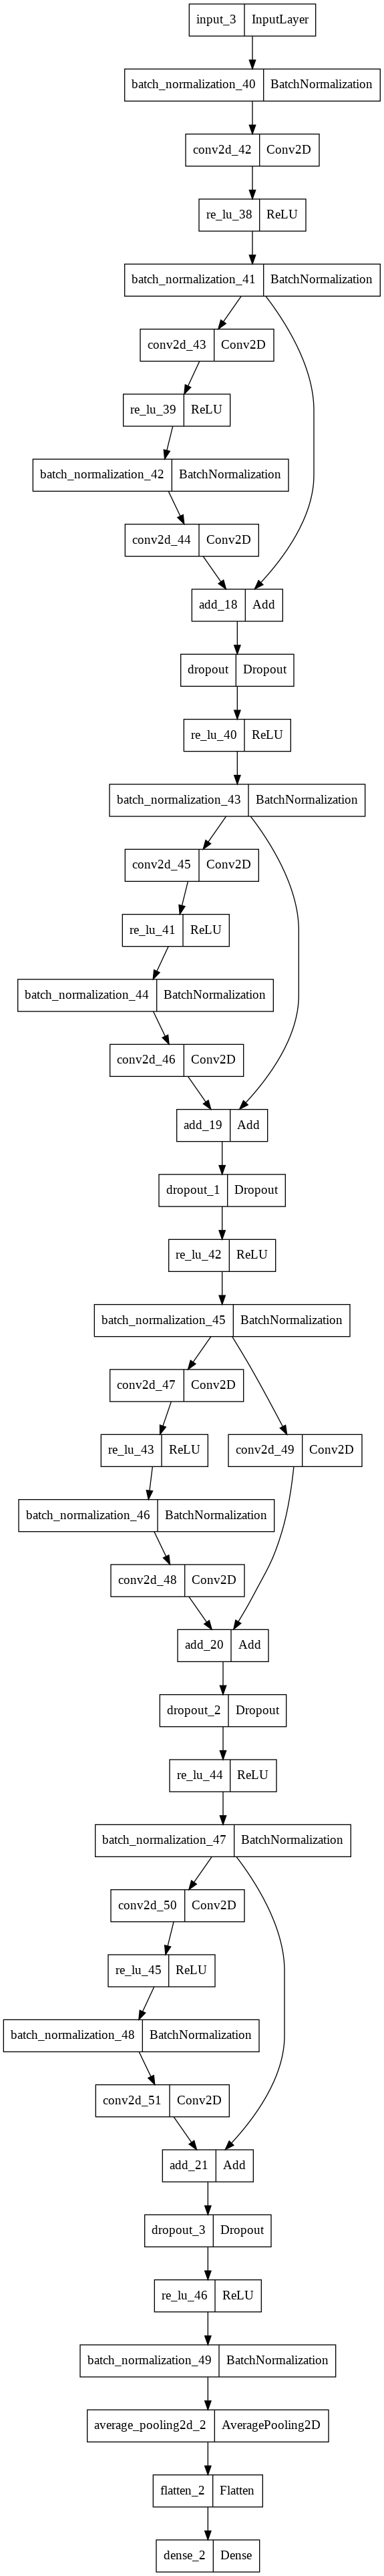

In [ ]:
now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)



modelfile = nowTimeStampYYYYMMDD + '_testmodel_dropout02_res003.png'
tf.keras.utils.plot_model(
    model, to_file=modelfile, show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

In [ ]:
def model_create_res_netv031DropoutAddDense():
    
    inputs = Input(shape=(32, 32, 3))
    num_filters = 32
    
    t = BatchNormalization()(inputs)
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)
    
    num_blocks_list = [2, 2]
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block_withDropout(t, downsample=(j==0 and i!=0), filters=num_filters, dropoutFactor=0.2)
        num_filters *= 2
    
    t = AveragePooling2D(4)(t)
    t = Flatten()(t)
    
    print ('Adding one more 64 Dense Layer with dropout =0.2 ')
    t = Dense(64, activation='relu')(t)
    t = keras.layers.Dropout(rate=0.2) (t)

    
    outputs = Dense(10, activation='softmax')(t)
    
    model = Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
model = model_create_res_netv031DropoutAddDense()
print (model.summary() ) 

Adding one more 64 Dense Layer with dropout =0.2 
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization_10 (BatchN  (None, 32, 32, 3)   12          ['input_2[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv2d_10 (Conv2D)             (None, 32, 32, 32)   896         ['batch_normalization_10[0][0]'] 
                                                                                                  
 re_lu_9 (ReLU)                 (None, 32,

Try out 2 resBlocks only with Dropout=0.2 within the resBlocks...add 1 more dense 64 with dropout
Epoch 1/30
500/500 [==============================] - 49s 77ms/step - loss: 1.3270 - accuracy: 0.5226 - val_loss: 1.0171 - val_accuracy: 0.6443
Epoch 2/30
500/500 [==============================] - 38s 77ms/step - loss: 0.9074 - accuracy: 0.6821 - val_loss: 0.7688 - val_accuracy: 0.7305
Epoch 3/30
500/500 [==============================] - 38s 75ms/step - loss: 0.7547 - accuracy: 0.7365 - val_loss: 0.7062 - val_accuracy: 0.7519
Epoch 4/30
500/500 [==============================] - 38s 75ms/step - loss: 0.6668 - accuracy: 0.7662 - val_loss: 0.6331 - val_accuracy: 0.7778
Epoch 5/30
500/500 [==============================] - 38s 75ms/step - loss: 0.5979 - accuracy: 0.7902 - val_loss: 0.5772 - val_accuracy: 0.8025
Epoch 6/30
500/500 [==============================] - 38s 75ms/step - loss: 0.5438 - accuracy: 0.8093 - val_loss: 0.5913 - val_accuracy: 0.7950
Epoch 7/30
500/500 [==================

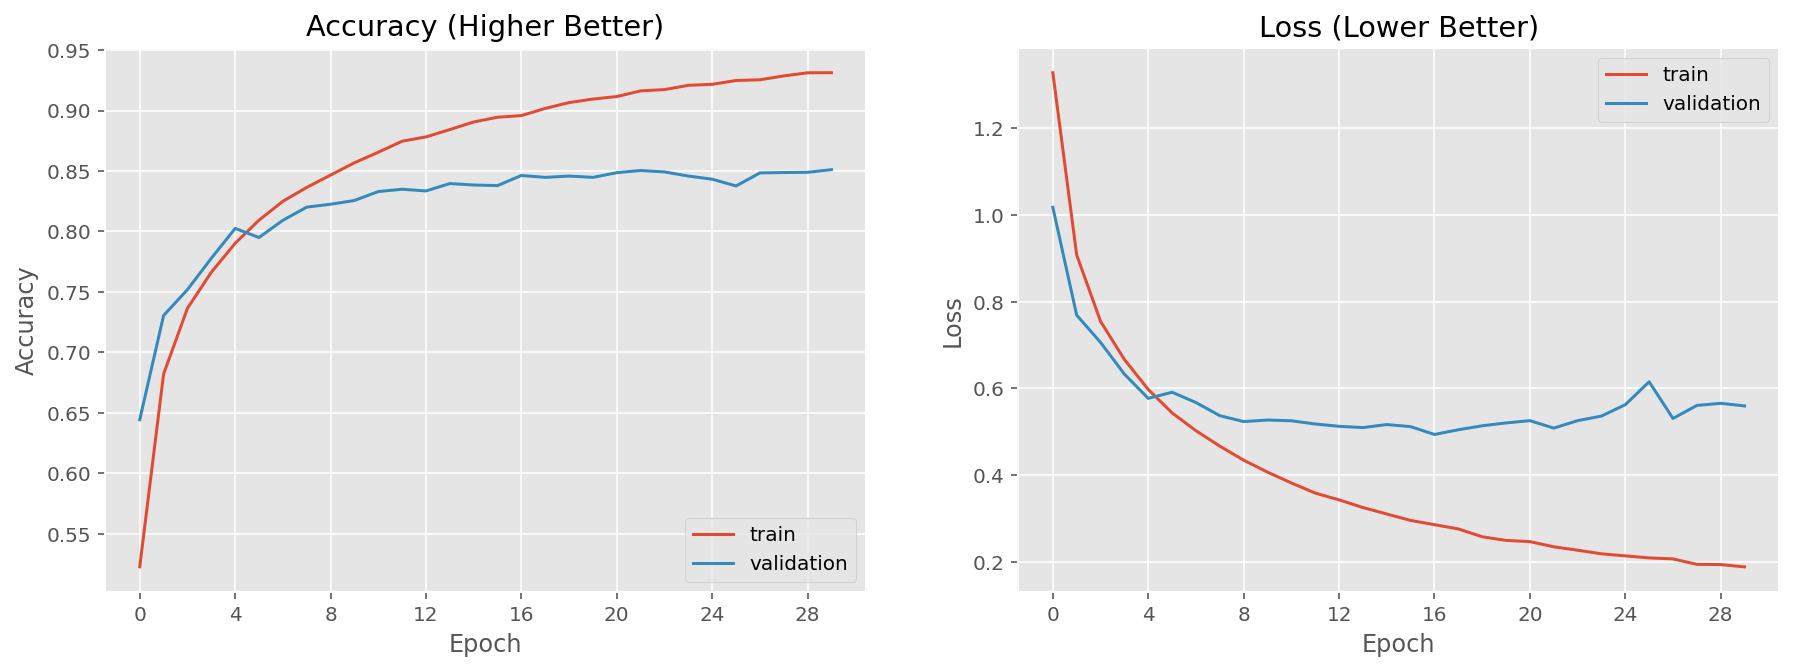

In [ ]:
print('Try out 2 resBlocks only with Dropout=0.2 within the resBlocks...add 1 more dense 64 with dropout')
import time
start = time.time()

# fit model
history = model.fit(trainX, trainy, epochs=30, batch_size=100, validation_data=(testX, testy), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))
#score = model.evaluate(x_test, y_test, verbose=0)
end = time.time()
print('Time Taken = ', (end - start) )

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

nowTimeStampYYYYMMDD: 20211127_073544


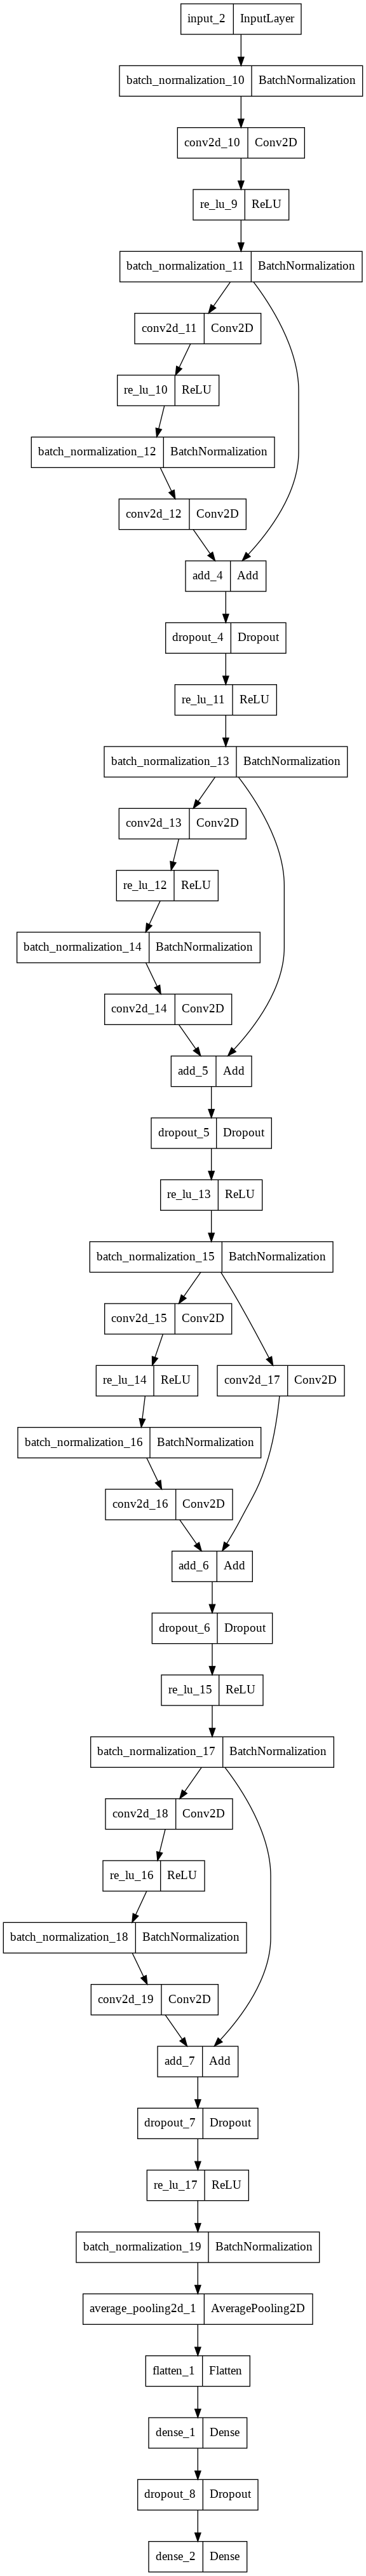

In [ ]:
now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)



modelfile = nowTimeStampYYYYMMDD + '_testmodel_dropout02_1moredense_res004.png'
tf.keras.utils.plot_model(
    model, to_file=modelfile, show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

In [114]:
def model_create_res_netv035DropoutAddDense():
    
    inputs = Input(shape=(32, 32, 3))
    num_filters = 32
    
    t = BatchNormalization()(inputs)
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)
    
    num_blocks_list = [2, 2, 3, 3 ]
    
    print('---- [== note Num of ResidulaBlock ==] -->', len( num_blocks_list ))

    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block_withDropout(t, downsample=(j==0 and i!=0), filters=num_filters, dropoutFactor=0.2)
        num_filters *= 2
    
    t = AveragePooling2D(4)(t)
    t = Flatten()(t)
    
    print ('Adding one more 64 Dense Layer with dropout =0.2 + bn at dense')
    t = Dense(64, activation='relu')(t)
    t = keras.layers.Dropout(rate=0.2) (t)
    t = BatchNormalization()(t)


    outputs = Dense(10, activation='softmax')(t)
    
    model = Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [116]:
model = model_create_res_netv035DropoutAddDense()
print (model.summary() ) 

---- [== note Num of ResidulaBlock ==] --> 4
Adding one more 64 Dense Layer with dropout =0.2 + bn at dense
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization_48 (BatchN  (None, 32, 32, 3)   12          ['input_4[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv2d_49 (Conv2D)             (None, 32, 32, 32)   896         ['batch_normalization_48[0][0]'] 
                                                                                   

Try out n resBlocks only with Dropout=0.2 within the resBlocks...add 1 more dense 64 with dropout..eppoch = 30 
Epoch 1/30
500/500 [==============================] - 73s 138ms/step - loss: 1.7137 - accuracy: 0.3691 - val_loss: 1.6288 - val_accuracy: 0.4794
Epoch 2/30
500/500 [==============================] - 70s 140ms/step - loss: 1.2384 - accuracy: 0.5555 - val_loss: 1.6290 - val_accuracy: 0.5592
Epoch 3/30
500/500 [==============================] - 68s 137ms/step - loss: 1.0080 - accuracy: 0.6441 - val_loss: 1.0642 - val_accuracy: 0.6654
Epoch 4/30
500/500 [==============================] - 70s 140ms/step - loss: 0.8611 - accuracy: 0.7025 - val_loss: 0.8542 - val_accuracy: 0.7191
Epoch 5/30
500/500 [==============================] - 69s 138ms/step - loss: 0.7567 - accuracy: 0.7434 - val_loss: 0.7438 - val_accuracy: 0.7553
Epoch 6/30
500/500 [==============================] - 71s 142ms/step - loss: 0.6794 - accuracy: 0.7702 - val_loss: 0.6311 - val_accuracy: 0.7882
Epoch 7/30
500/500

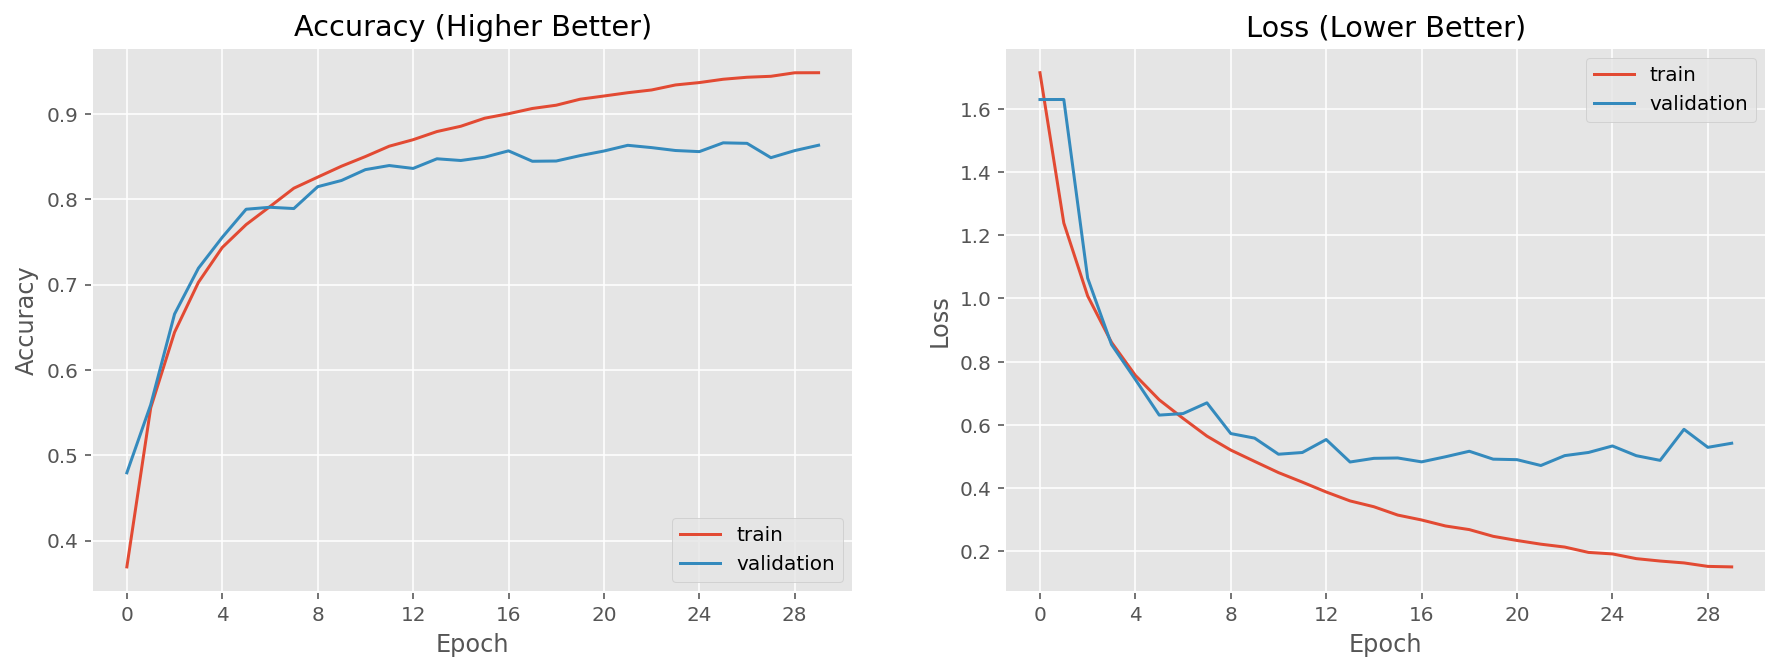

In [117]:
#RERUN
print('Try out n resBlocks only with Dropout=0.2 within the resBlocks...add 1 more dense 64 with dropout..eppoch = 30 ')
# fit model
import time
start = time.time()

history = model.fit(trainX, trainy, epochs=30, batch_size=100, validation_data=(testX, testy), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))
end = time.time()
print('Time Taken = ', (end - start) )

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

nowTimeStampYYYYMMDD: 20211204_103740


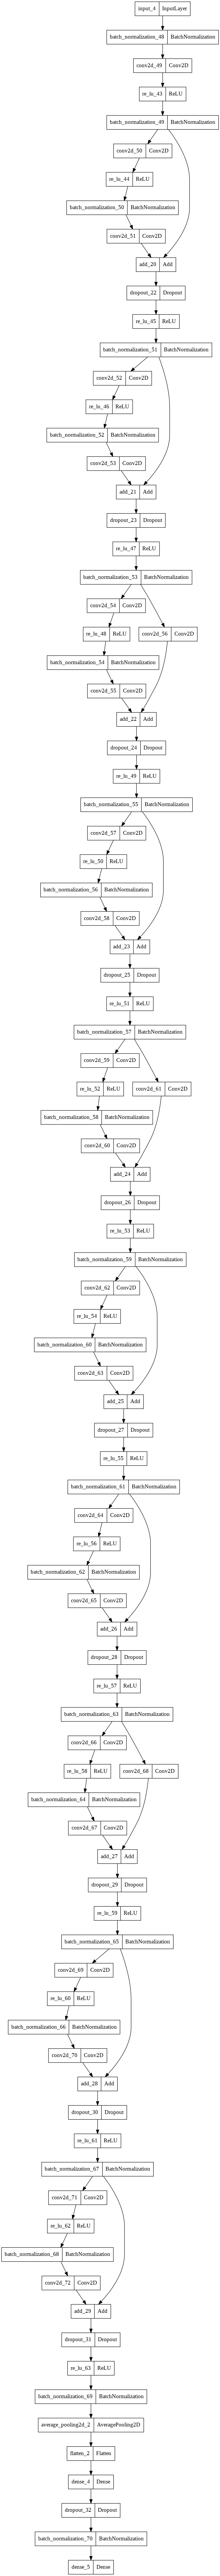

In [118]:
now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)

modelfile = nowTimeStampYYYYMMDD + '_testmodel_create_res_netv035DropoutAddDense_epoch30.png'
tf.keras.utils.plot_model(
    model, to_file=modelfile, show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

In [119]:
#xporting model to .h5 
import time
today = time.strftime("%Y%m%d_%H%M%S")
filename= today + '_model_create_res_netv035DropoutAddDense'+ '_epoch30'+ '_afterBN_fin.h5' 

model.save(filename)
print("Saved model to disk")

#filename='model_035DropoutAddDense' + today + '_afterBN_fin.h5' 
#model.save_weights(filename)
#print("Saved model weights to disk")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk


In [ ]:
model = model_create_res_netv035DropoutAddDense()
print (model.summary() )

---- [== note Num of ResidulaBlock ==] --> 4
Adding one more 64 Dense Layer with dropout =0.2 + bn at dense
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization_43 (BatchN  (None, 32, 32, 3)   12          ['input_4[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv2d_44 (Conv2D)             (None, 32, 32, 32)   896         ['batch_normalization_43[0][0]'] 
                                                                                   

Try out n resBlocks only with Dropout=0.2 within the resBlocks...add 1 more dense 64 with dropout, try epoch = 60, adopt earlyStopping Accuracy
Epoch 1/60
500/500 [==============================] - 82s 139ms/step - loss: 1.7419 - accuracy: 0.3662 - val_loss: 2.3048 - val_accuracy: 0.3903
Epoch 2/60
500/500 [==============================] - 69s 137ms/step - loss: 1.2539 - accuracy: 0.5532 - val_loss: 1.5123 - val_accuracy: 0.5552
Epoch 3/60
500/500 [==============================] - 69s 137ms/step - loss: 1.0083 - accuracy: 0.6457 - val_loss: 0.9897 - val_accuracy: 0.6912
Epoch 4/60
500/500 [==============================] - 69s 137ms/step - loss: 0.8603 - accuracy: 0.7043 - val_loss: 0.8016 - val_accuracy: 0.7367
Epoch 5/60
500/500 [==============================] - 69s 137ms/step - loss: 0.7500 - accuracy: 0.7465 - val_loss: 0.7548 - val_accuracy: 0.7484
Epoch 6/60
500/500 [==============================] - 70s 141ms/step - loss: 0.6743 - accuracy: 0.7737 - val_loss: 0.7095 - val_acc

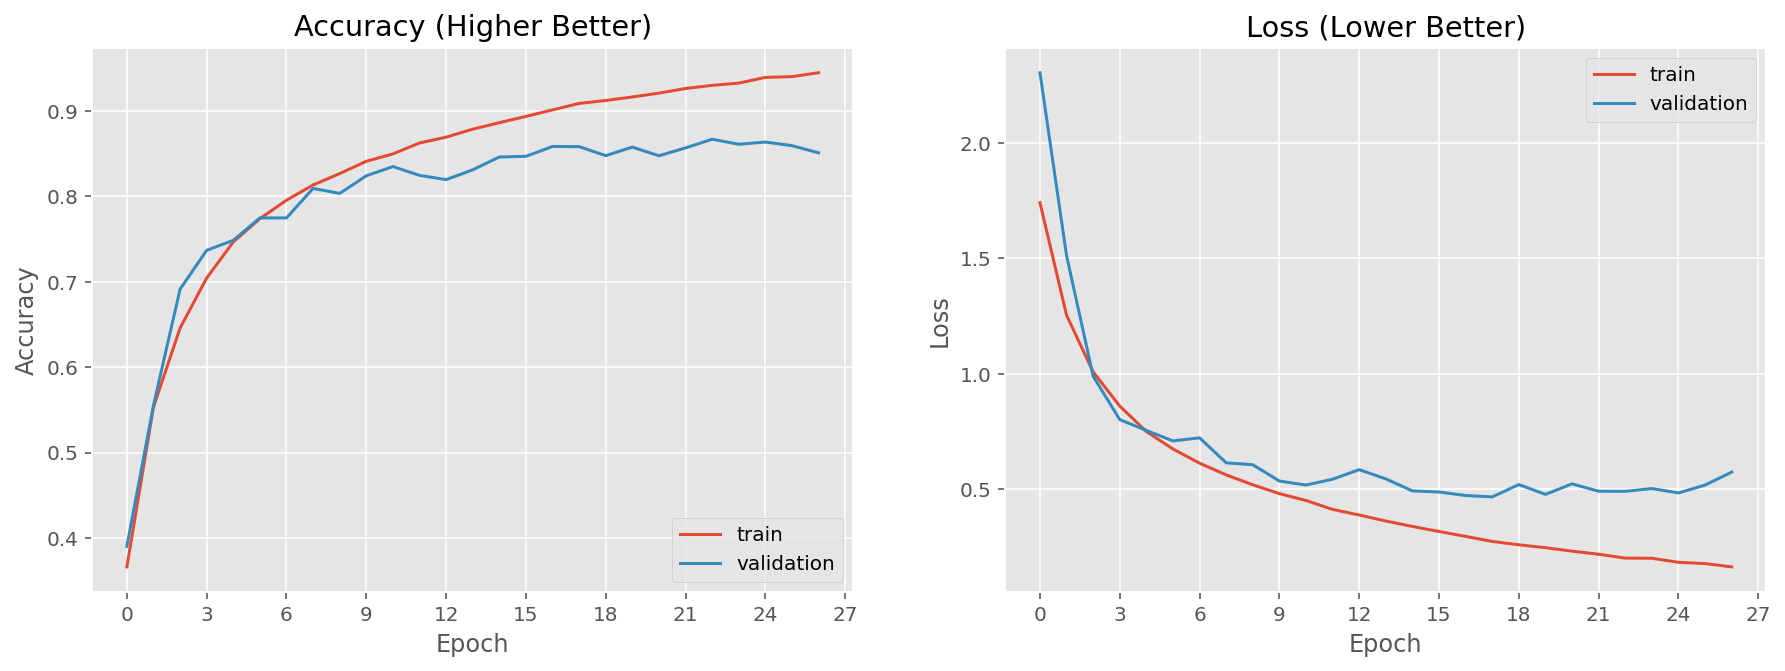

In [49]:
print('Try out n resBlocks only with Dropout=0.2 within the resBlocks...add 1 more dense 64 with dropout, try epoch = 60, adopt earlyStopping Accuracy')
# fit model

#let's adopt an early stopping
es2 = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=False,
)

esForAccuracy = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience =10, min_delta=0.01, verbose=1)

import time
start = time.time()

history = model.fit(trainX, trainy, epochs=60, batch_size=100, validation_data=(testX, testy), verbose=1, callbacks=[esForAccuracy])
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))
end = time.time()
print('Time Taken = ', (end - start) )

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

In [ ]:
#xporting model to .h5 
import time
today = time.strftime("%Y%m%d_%H%M%S")
filename= today + '_model_create_res_netv035DropoutAddDense'+ '_epoch60'+ '_ES_afterBN_fin.h5' 

model.save(filename)
print("Saved model to disk")

#filename='model_035DropoutAddDense' + today + '_afterBN_fin.h5' 
#model.save_weights(filename)
#print("Saved model weights to disk")


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk


nowTimeStampYYYYMMDD: 20211127_085033


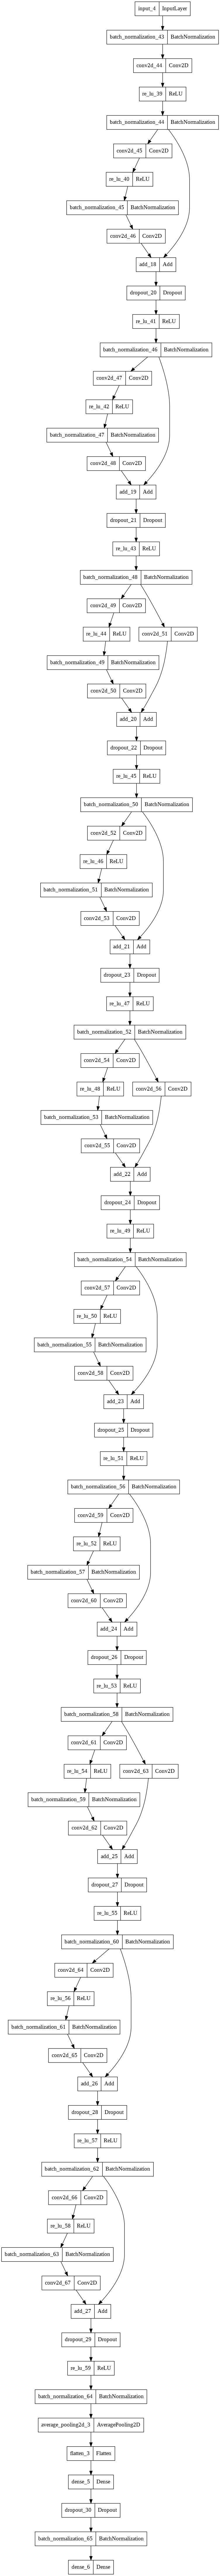

In [ ]:
now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)

modelfile = nowTimeStampYYYYMMDD + '_testmodel_create_res_netv035DropoutAddDense_epoch60.png'
tf.keras.utils.plot_model(
    model, to_file=modelfile, show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

## End building a ResNet model

# END Building a Model

# Getting an Evaluation

GETTING AN evalution

In [ ]:
#Optional - we load back the saved model if we are coming to this work on another day 
#model = tf.keras.models.load_model(
#    'model_20211123_afterBN_epoch60_ESAccuracy_Leaky_fin.h5', custom_objects=None, compile=True, options=None
#)

#20211127_085013_model_create_res_netv035DropoutAddDense_epoch60_ES_afterBN_fin

# model = tf.keras.models.load_model( 'model_20211126_afterBN_epoch60_ESAccuracy_Leaky_Eagerly_fin.h5', custom_objects=None, 
                                   compile=True, options=None ) 


In [120]:
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

In [121]:
#expected around (modelB) 0.92 - 1 
train_acc

0.9829999804496765

In [122]:
#expected 0.82 - 0.83 
test_acc

0.8632000088691711

In [ ]:
# train_acc

In [ ]:
# test_acc

# End Getting an evaluation

# START Getting a classification report 

In [123]:
#gettting a confusion matrix 
from sklearn.metrics import classification_report
predict_x = model.predict(testX) 
output = np.argmax(predict_x,axis=1)
print(output)


testyConverted = np.argmax(testy,axis=1)

[3 8 8 ... 5 1 7]


In [124]:
import sklearn.metrics

r = sklearn.metrics.confusion_matrix(testyConverted, output)
print(r)

[[944   6  10   0   5   0   3   2  23   7]
 [ 13 964   1   0   0   0   3   1   6  12]
 [ 67   2 787  18  51  26  33  11   3   2]
 [ 39   4  56 669  43 107  45  27   5   5]
 [ 18   1  20  16 891  11  25  16   2   0]
 [ 23   2  28  84  27 795   7  32   0   2]
 [ 14   3  26  17  13  11 905   6   5   0]
 [ 11   1  16   6  29  20   0 915   0   2]
 [ 51  16   6   2   3   1   4   2 901  14]
 [ 30  76   4   3   1   3   3   8  11 861]]


In [125]:
#workinh with index 
print(classification_report(testyConverted, output,zero_division=0 ))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1000
           1       0.90      0.96      0.93      1000
           2       0.82      0.79      0.81      1000
           3       0.82      0.67      0.74      1000
           4       0.84      0.89      0.86      1000
           5       0.82      0.80      0.81      1000
           6       0.88      0.91      0.89      1000
           7       0.90      0.92      0.91      1000
           8       0.94      0.90      0.92      1000
           9       0.95      0.86      0.90      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [126]:
print(classification_report(testyConverted, output,zero_division=0 , target_names=load_label_names() ))

              precision    recall  f1-score   support

    airplane       0.78      0.94      0.85      1000
  automobile       0.90      0.96      0.93      1000
        bird       0.82      0.79      0.81      1000
         cat       0.82      0.67      0.74      1000
        deer       0.84      0.89      0.86      1000
         dog       0.82      0.80      0.81      1000
        frog       0.88      0.91      0.89      1000
       horse       0.90      0.92      0.91      1000
        ship       0.94      0.90      0.92      1000
       truck       0.95      0.86      0.90      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# END Getting a classification report

# GEtting confusion matrix 

In [127]:
import sklearn.metrics

r = sklearn.metrics.confusion_matrix(testyConverted, output)
print(r)

[[944   6  10   0   5   0   3   2  23   7]
 [ 13 964   1   0   0   0   3   1   6  12]
 [ 67   2 787  18  51  26  33  11   3   2]
 [ 39   4  56 669  43 107  45  27   5   5]
 [ 18   1  20  16 891  11  25  16   2   0]
 [ 23   2  28  84  27 795   7  32   0   2]
 [ 14   3  26  17  13  11 905   6   5   0]
 [ 11   1  16   6  29  20   0 915   0   2]
 [ 51  16   6   2   3   1   4   2 901  14]
 [ 30  76   4   3   1   3   3   8  11 861]]


Printing confusion matrix without label names 


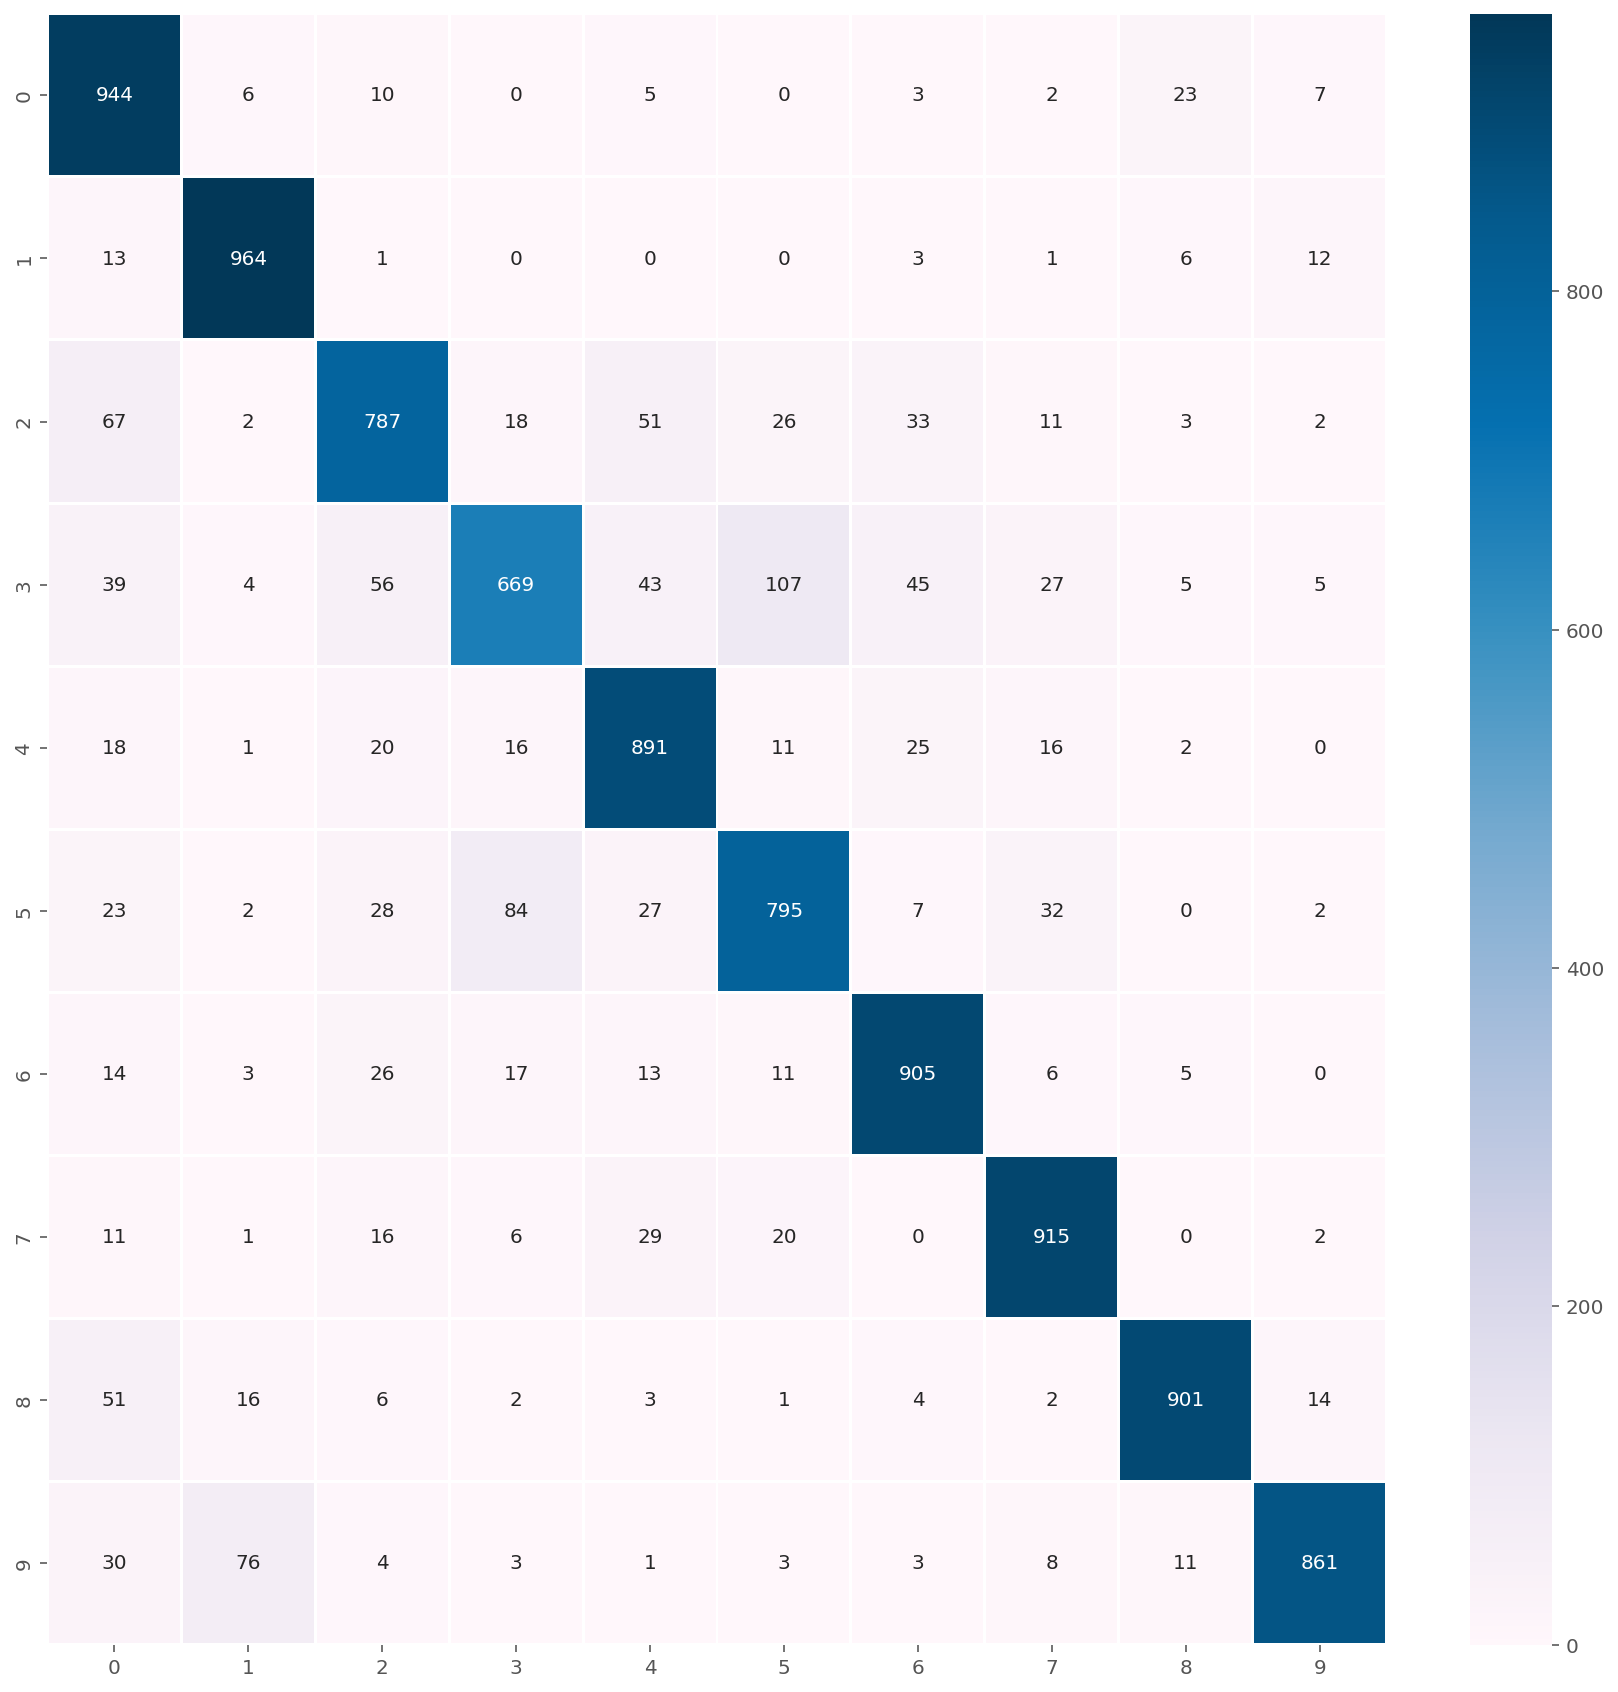

In [128]:
from sklearn.metrics import classification_report, confusion_matrix
print('Printing confusion matrix without label names ')
import seaborn as sns
plt.figure(figsize=(15,15))
cf_matrix = confusion_matrix(testyConverted, output)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g',cmap="PuBu" )

Saved confusion matrix to disk


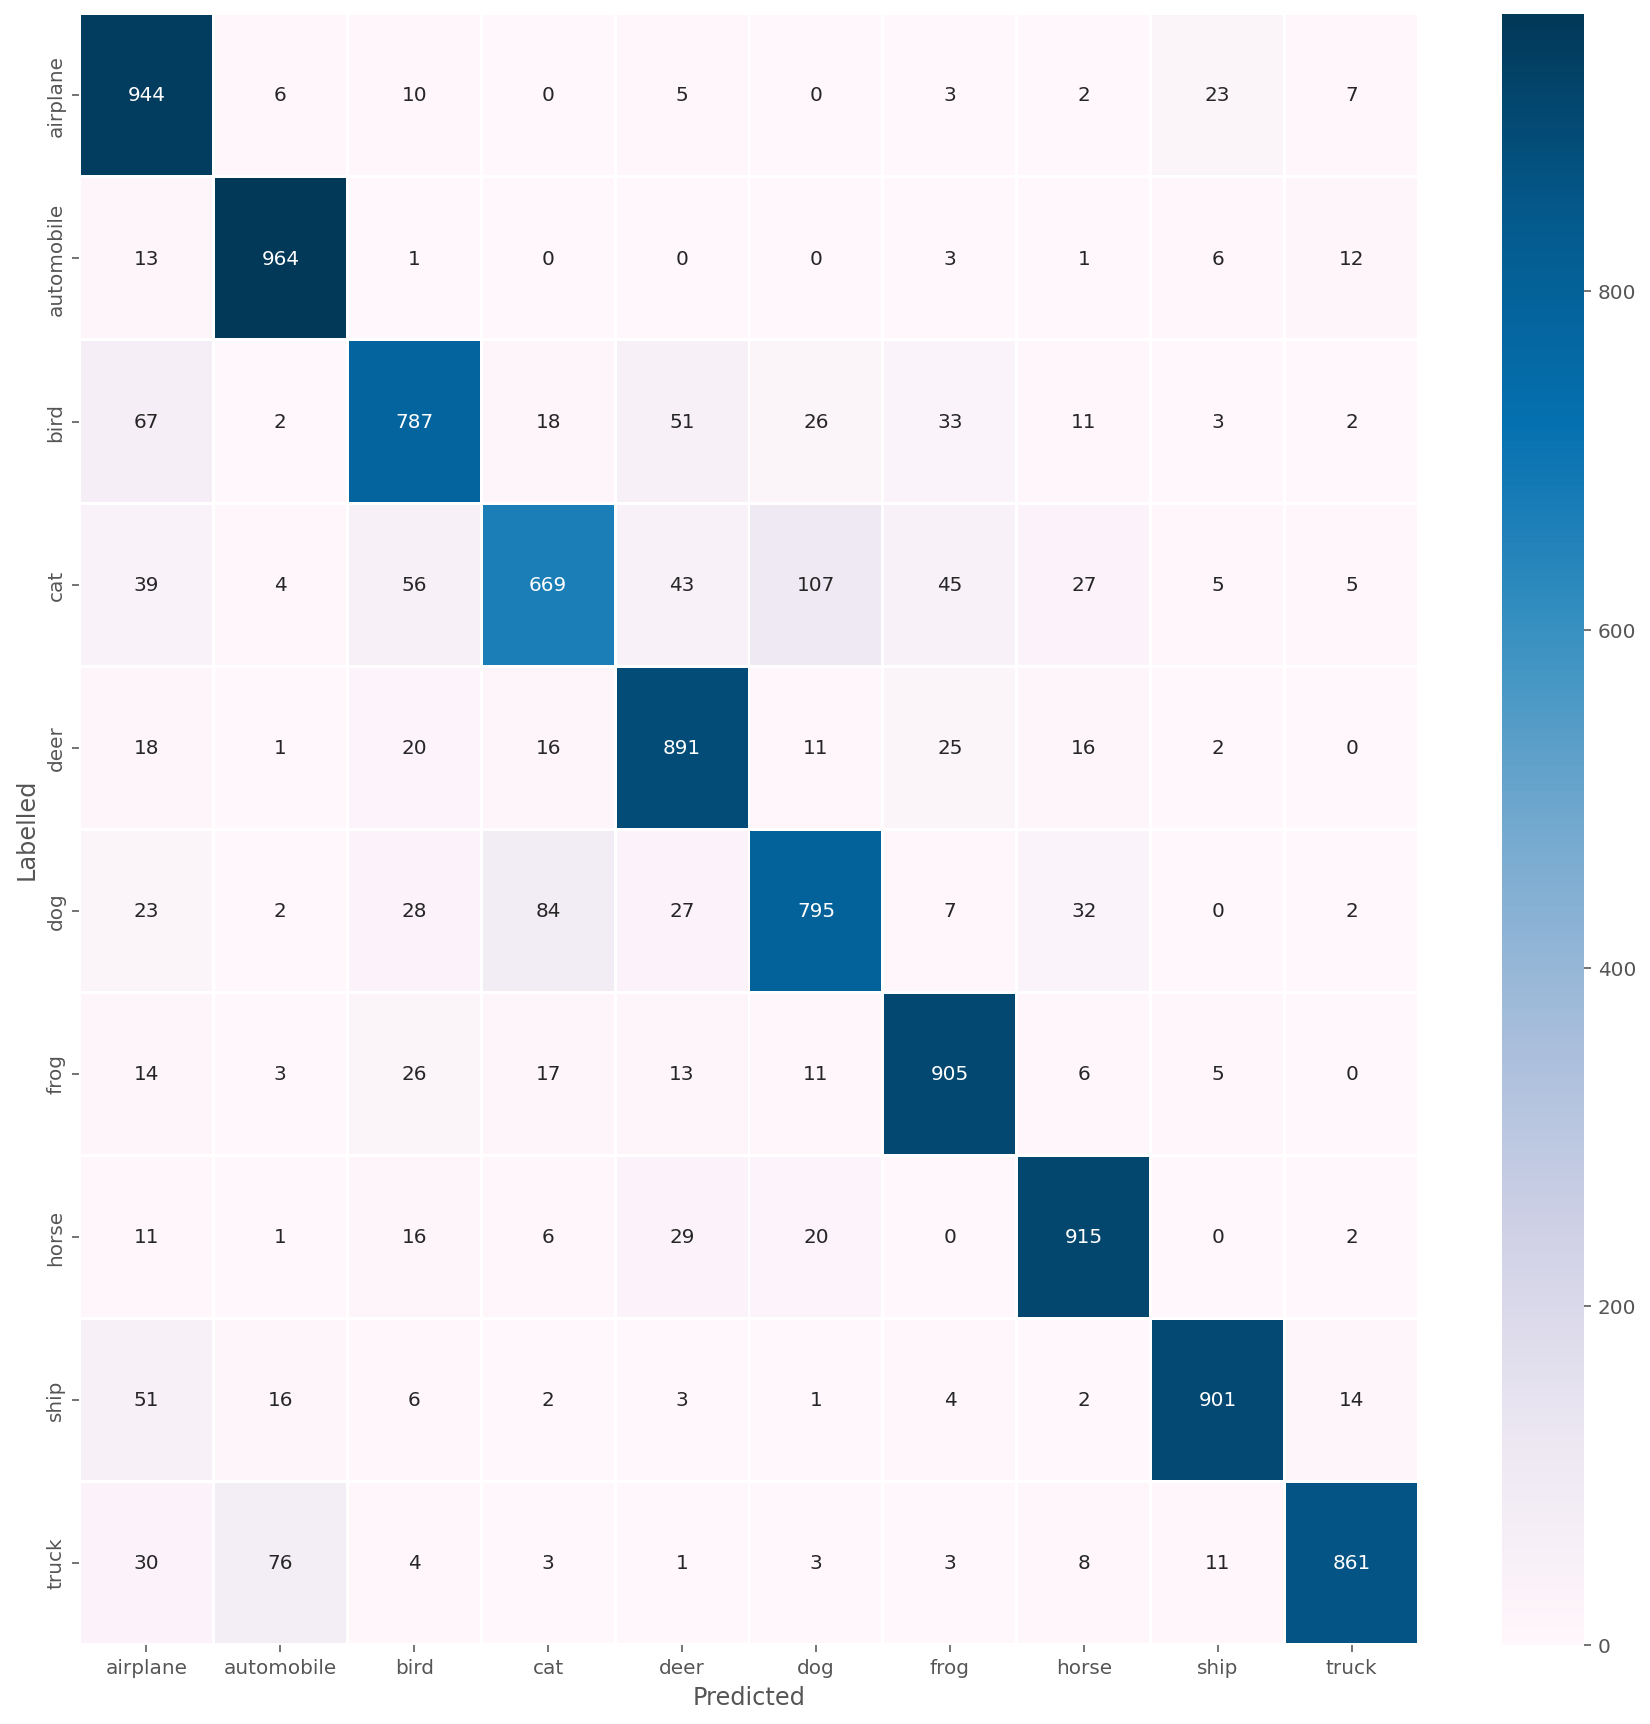

In [129]:
#try refer to this article https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c 

# figure
fig, ax = plt.subplots(figsize=(15, 15))


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
##output = predicted 
##testY = label

cf_matrix = confusion_matrix(testyConverted, output)
xticks_labels = load_label_names() 
yticks_labels = load_label_names()
p = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels =xticks_labels, yticklabels = yticks_labels, cmap="PuBu" )

#x=predicted
#y=label 

plt.xlabel('Predicted')
plt.ylabel('Labelled')

#plt.xticks(np.arange(12) + .5, labels=xticks_labels)
#plt.xticks(  labels=xticks_labels)
import time

nowTimeStampYYYYMMDDHHMMSS = time.strftime("%Y%m%d"+'_'+ "%H%M%S" )
plt.savefig('ModelB_'+nowTimeStampYYYYMMDDHHMMSS+'_confusionMatrix_.png')



print("Saved confusion matrix to disk")


In [ ]:
import time

nowTimeStampYYYYMMDDHHMMSS = time.strftime("%Y%m%d"+'_'+ "%H%M%S" )
plt.savefig('ModelA_'+nowTimeStampYYYYMMDDHHMMSS+'_confusionMatrix_.png')



print("Saved confusion matrix to disk")

Saved confusion matrix to disk


<Figure size 432x288 with 0 Axes>

## End Getting Confusion Matrix 

## (Optional) Getting a picture in the middle & heatmap 

We observed that cat has a lot of misclassifications as dog. Let's take a look at the feature maps + heatmap to try to find out why

In [130]:
#we get an index of where the predict and label are not correct 
# predicts = output 
# testyConverted = labels 
ind = np.where(np.equal(output, testyConverted)==0)


In [131]:
len(ind[0])

1368

In [132]:
allWrongPredictins = ind[0]
print (allWrongPredictins.ndim) 
print ('There are ', len(allWrongPredictins),'wrong predictions')

1
There are  1368 wrong predictions


In [ ]:
# adopted from FRancios book 


In [ ]:
##We try to get an index where ttruelabel = cat but has predict as something else 

In [ ]:
##CATS 2

In [133]:
labelNames = load_label_names()
#cat_index = 3 

In [134]:
#CATS 2 

#testyConverted=labels
b=0
index_Of_label_to_check = 3 
# cat => index 3 

allCats_Wrong_Ind= [] 

for i in range (len(testyConverted)):
    #print (i)
    if (testyConverted[i]==index_Of_label_to_check and output[i]!=index_Of_label_to_check ):
        #print (b) 
        b=b+1
        allCats_Wrong_Ind.append(i)

print ('There are ',b, ' wrong predictions for', labelNames [ index_Of_label_to_check ] ) 
#print (len(testyConverted))
#print (len(output))

There are  331  wrong predictions for cat


In [135]:
#for i in allCats_Wrong_Ind:
#  print(i)

allCats_Wrong_Ind_arr = np.array ( allCats_Wrong_Ind )


In [ ]:
#print out the array 

#allCats_Wrong_Ind_arr

In [ ]:
#francois 

In [136]:
#testyConverted=labels
b=0
index_Of_label_to_check = 3 
# cat => index 3 

allCats_Correct_Ind= [] 

for i in range (len(testyConverted)):
    #print (i)
    if (testyConverted[i]==index_Of_label_to_check and output[i]==index_Of_label_to_check ):
        #print (b) 
        b=b+1
        allCats_Correct_Ind.append(i)

print ('There are ',b, ' right predictions for', labelNames [ index_Of_label_to_check ] ) 
#print (len(testyConverted))
#print (len(output))

There are  669  right predictions for cat


In [ ]:
#allCats_Correct_Ind

In [165]:
sample_correct_cat_index = allCats_Correct_Ind[51]  ##was 1 #choose a sample index 

In [166]:
sample_correct_cat_index

760

index2 50 index value 716


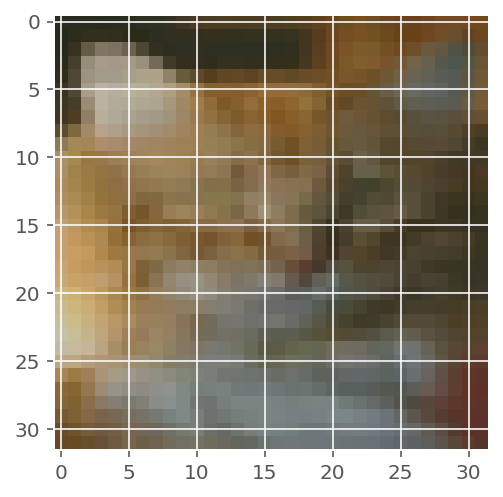

index2 51 index value 760


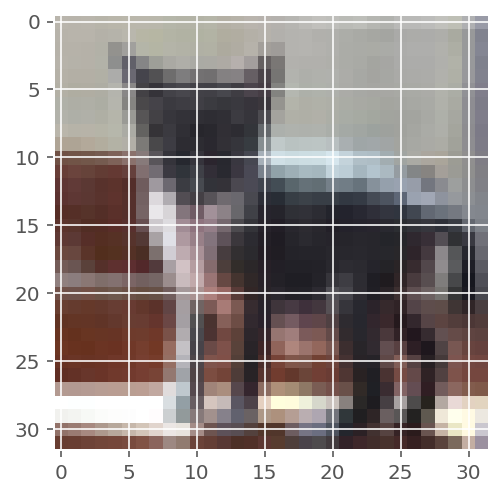

index2 52 index value 786


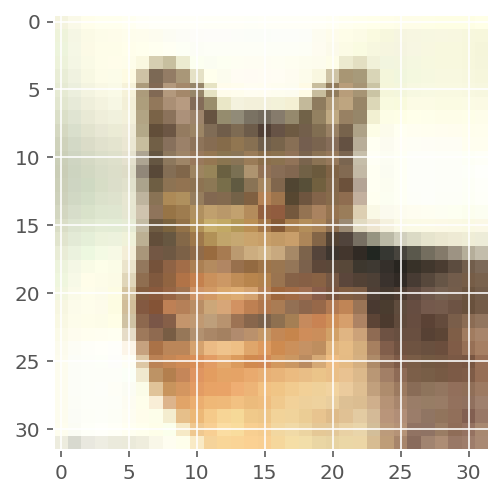

index2 53 index value 825


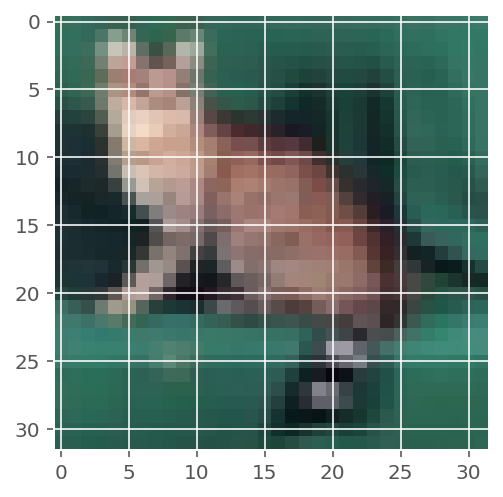

index2 54 index value 829


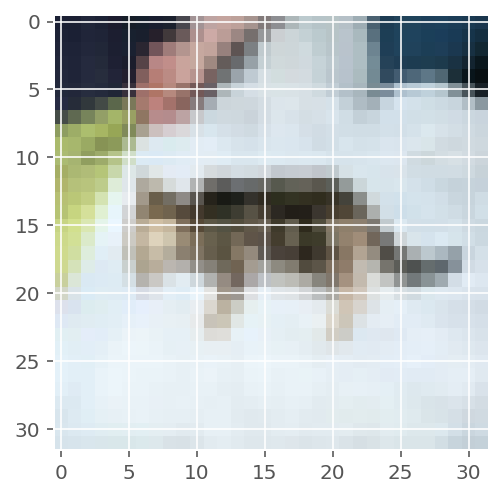

index2 55 index value 863


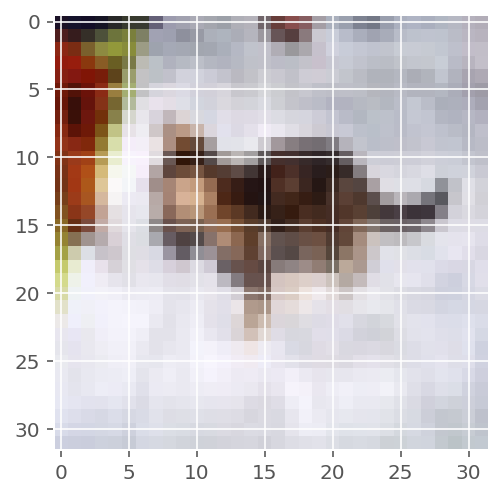

index2 56 index value 870


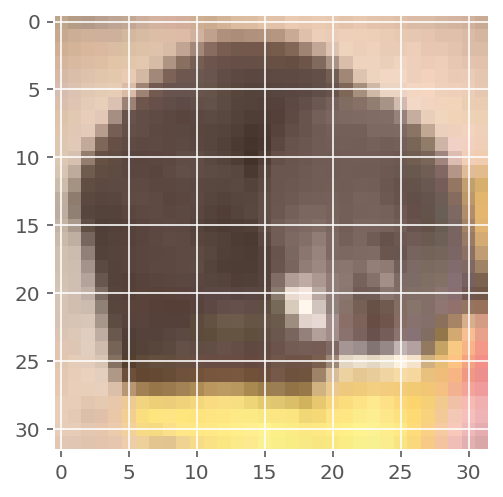

index2 57 index value 874


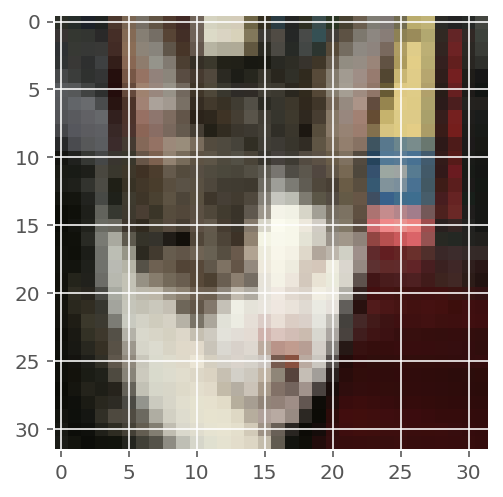

index2 58 index value 878


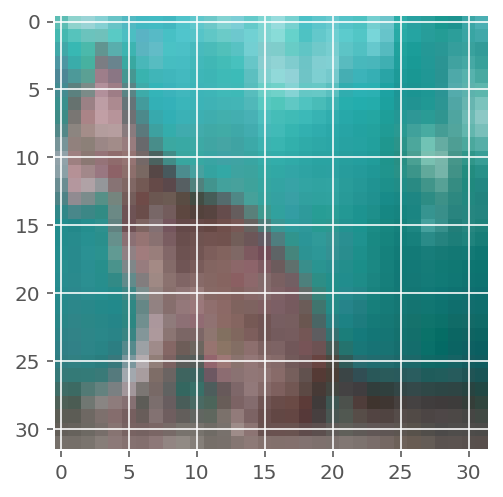

index2 59 index value 896


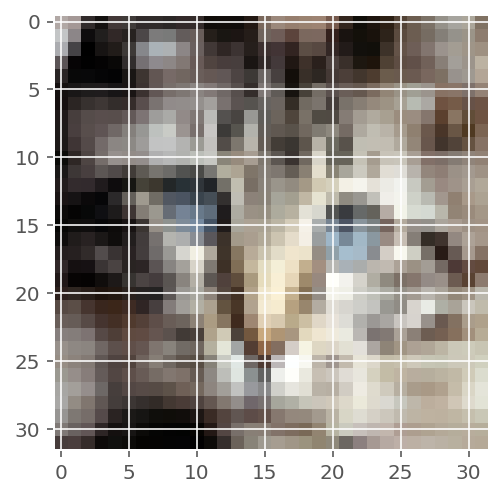

In [167]:
for index1 in range(50,60):
    print ('index2',index1, 'index value', allCats_Correct_Ind[ index1 ] )
    img_tensor = testX [allCats_Correct_Ind[ index1 ]]
    plt.imshow(img_tensor)
    plt.show()


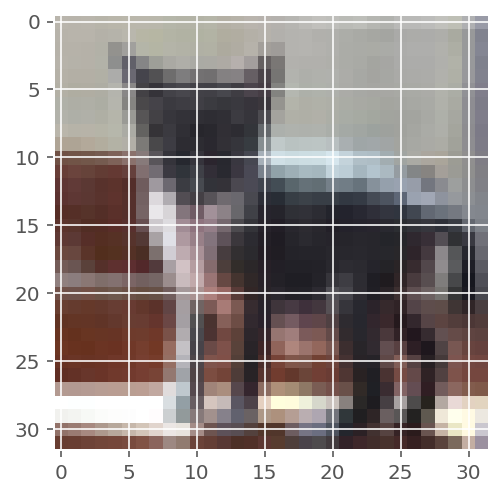

In [169]:
#since each run is different, we may get a different "correct" cat index 
img_tensor = testX [sample_correct_cat_index]
plt.imshow(img_tensor)
plt.show()

In [170]:
img_tensor.shape

(32, 32, 3)

In [171]:
img_tensor_expanded = np.expand_dims(img_tensor, axis=0)
img_tensor_expanded.shape

(1, 32, 32, 3)

In [ ]:
#model.summary()

In [172]:
#troubleshoot get heatmap for resNet
#adaption of another's code for feature map for this layer from 
#https://machinelearningmastery.com/

# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

2 conv2d_49 (None, 32, 32, 32)
5 conv2d_50 (None, 32, 32, 32)
8 conv2d_51 (None, 32, 32, 32)
13 conv2d_52 (None, 32, 32, 32)
16 conv2d_53 (None, 32, 32, 32)
21 conv2d_54 (None, 16, 16, 64)
24 conv2d_56 (None, 16, 16, 64)
25 conv2d_55 (None, 16, 16, 64)
30 conv2d_57 (None, 16, 16, 64)
33 conv2d_58 (None, 16, 16, 64)
38 conv2d_59 (None, 8, 8, 128)
41 conv2d_61 (None, 8, 8, 128)
42 conv2d_60 (None, 8, 8, 128)
47 conv2d_62 (None, 8, 8, 128)
50 conv2d_63 (None, 8, 8, 128)
55 conv2d_64 (None, 8, 8, 128)
58 conv2d_65 (None, 8, 8, 128)
63 conv2d_66 (None, 4, 4, 256)
66 conv2d_68 (None, 4, 4, 256)
67 conv2d_67 (None, 4, 4, 256)
72 conv2d_69 (None, 4, 4, 256)
75 conv2d_70 (None, 4, 4, 256)
80 conv2d_71 (None, 4, 4, 256)
83 conv2d_72 (None, 4, 4, 256)


In [173]:
# redefine model to output right after the layer
modelA = Model(inputs=model.inputs, outputs=model.layers[2].output)


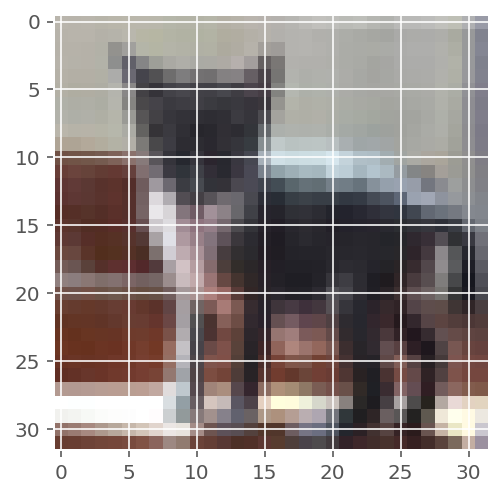

In [175]:
# load the image with the required shape

img_tensor = testX [sample_correct_cat_index]
plt.imshow(img_tensor)
plt.show()

#img = load_img('bird.jpg', target_size=(224, 224))

In [176]:
# convert the image to an array
#img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img_tensor_expanded = np.expand_dims(img_tensor, axis=0)

In [ ]:
# prepare the image (e.g. scale pixel values for the vgg)
#img = preprocess_input(img)

In [177]:
# get feature map for first hidden layer
feature_maps = modelA.predict(img_tensor_expanded)

In [178]:
feature_maps.shape

(1, 32, 32, 32)

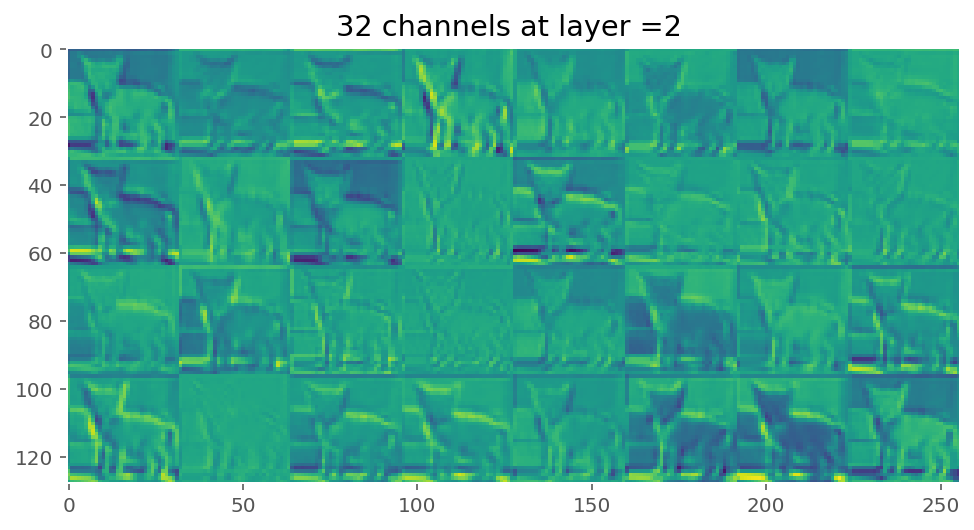

In [179]:
n_cols = 4 
images_per_row =  8
n_features = feature_maps.shape[-1]                               

size = feature_maps.shape[1]                                      

#Returns the integer value of the quotient 
n_cols = n_features // images_per_row                                 
display_grid = np.zeros((size * n_cols, images_per_row * size))

ix = 1

for col in range(n_cols):                                             
    for row in range(images_per_row):
        channel_image = feature_maps[0, :, :, ix-1]
        display_grid[col * size : (col + 1) * size,                   
                     row * size : (row + 1) * size] = channel_image
        ix += 1

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],
                    scale * display_grid.shape[0]))
plt.title('32 channels at layer =2 ')
plt.grid(False)

plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
#Revised to get output of these layers of Conn2D
# redefine model to output right after the first hidden layer
#use the other methdod to generate the maps
## ixs =  [2,16,41,83]
## outputs = [model.layers[i].output for i in ixs]
## 
## modelA_others = Model(inputs=model.inputs, outputs=outputs)
## 
## feature_maps = modelA_others.predict(img_tensor_expanded)
## # plot the output from each block
## square = 8
## counterActMap=0
## 
## for fmap in feature_maps:
##     n_features = fmap.shape[-1]                               
## 
##     size = fmap.shape[1]                                      
##     
##     n_cols = n_features // images_per_row                                 
##     display_grid = np.zeros((size * n_cols, images_per_row * size))
##     
##     ix = 1
##     
##     for col in range(n_cols):                                             
##         for row in range(images_per_row):
##             channel_image = fmap[0, :, :, ix-1]            
## 
##             display_grid[col * size : (col + 1) * size,                   
##                          row * size : (row + 1) * size] = channel_image
##             ix += 1
##     
##     scale = 1. / size
##     plt.figure(figsize=(scale * display_grid.shape[1],
##                         scale * display_grid.shape[0]))
##     plt.title('[2,16,41,83]')
##     plt.grid(False)
##     
##     plt.imshow(display_grid, aspect='auto', cmap='viridis')
##     #plt.savefig('ModelB_'+nowTimeStampYYYYMMDDHHMMSS+'_collectionOfFeatureMaps_'+str(counterActMap+1)+'_.png')
##     counterActMap = counterActMap + 1 
## #plt.savefig('ModelB_'+nowTimeStampYYYYMMDDHHMMSS+'_collectionOfFeatureMaps_.png')
## plt.show()

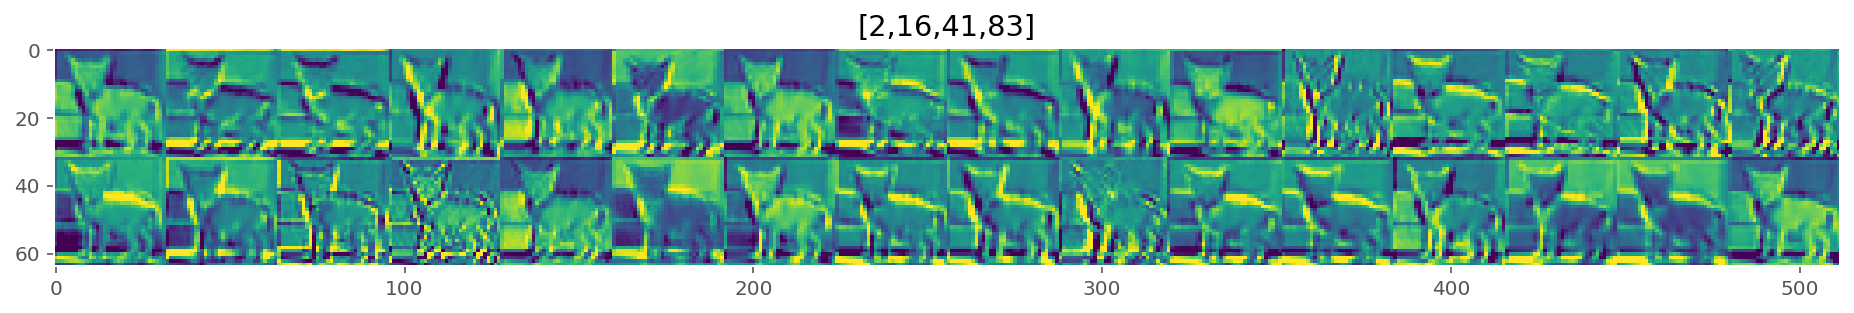

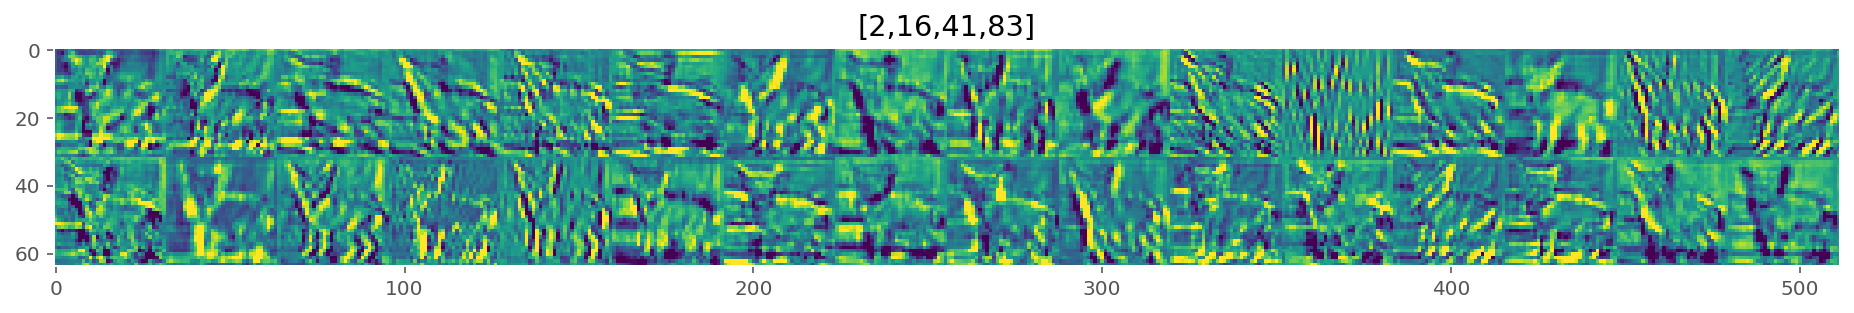

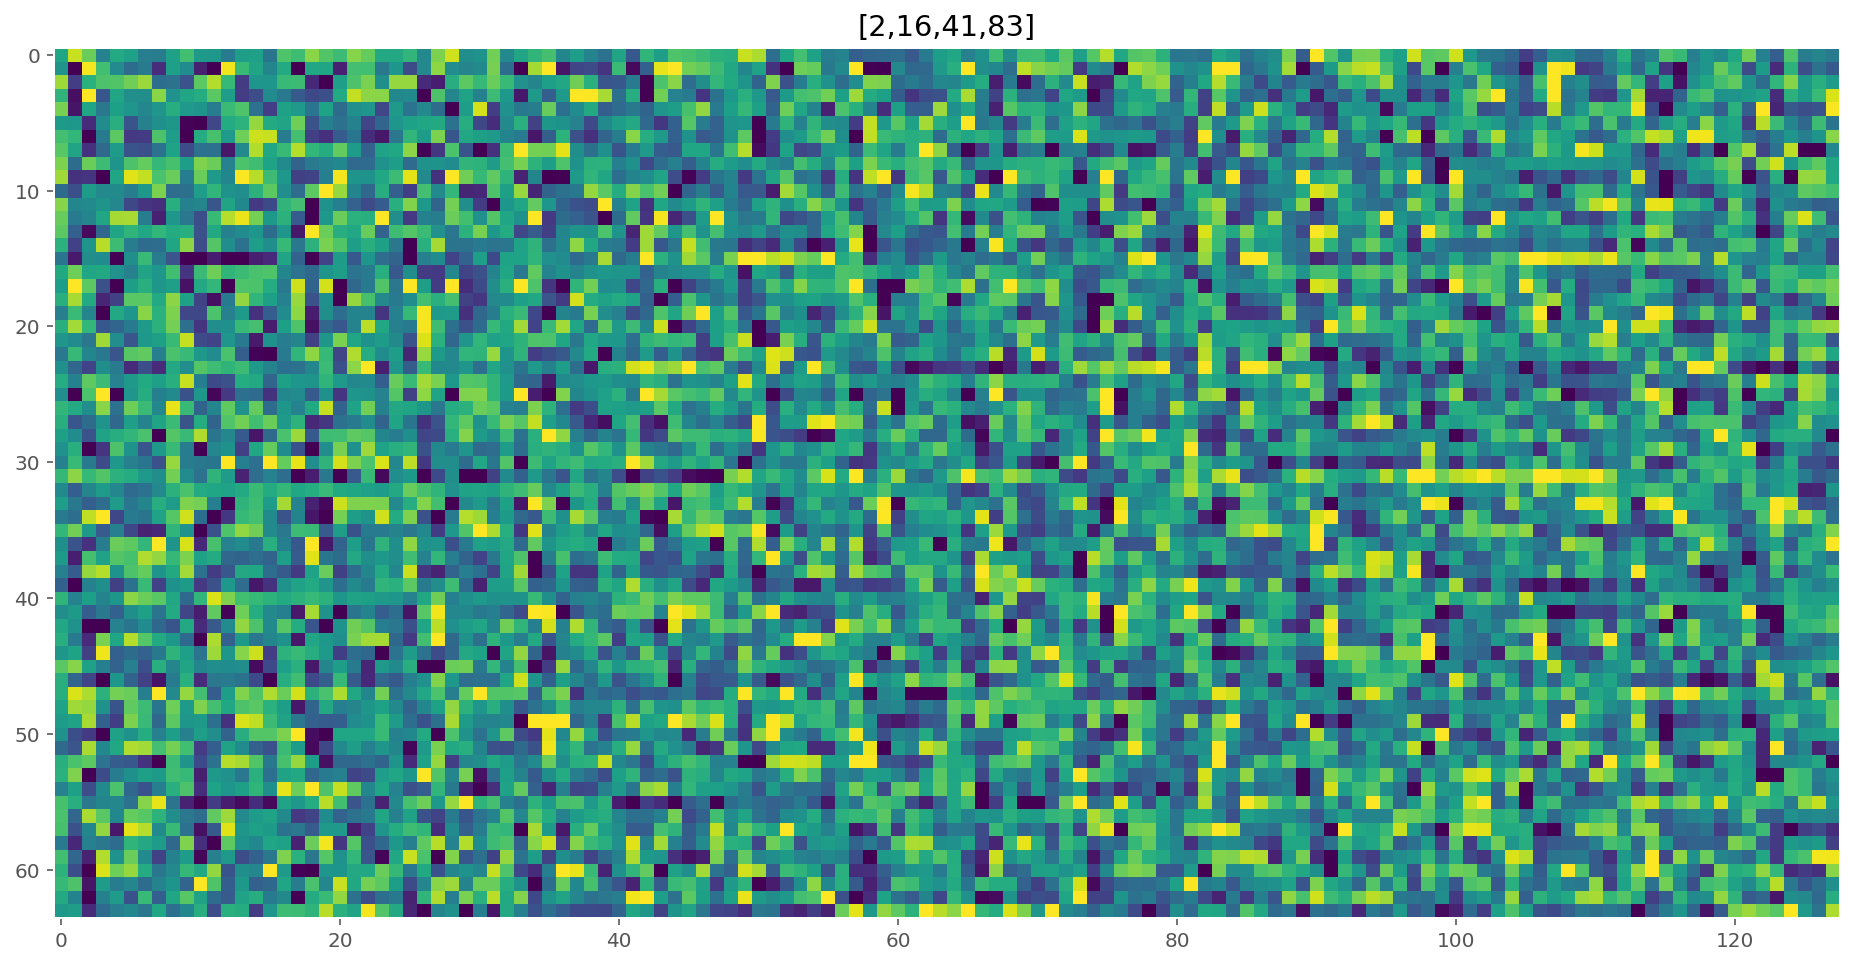

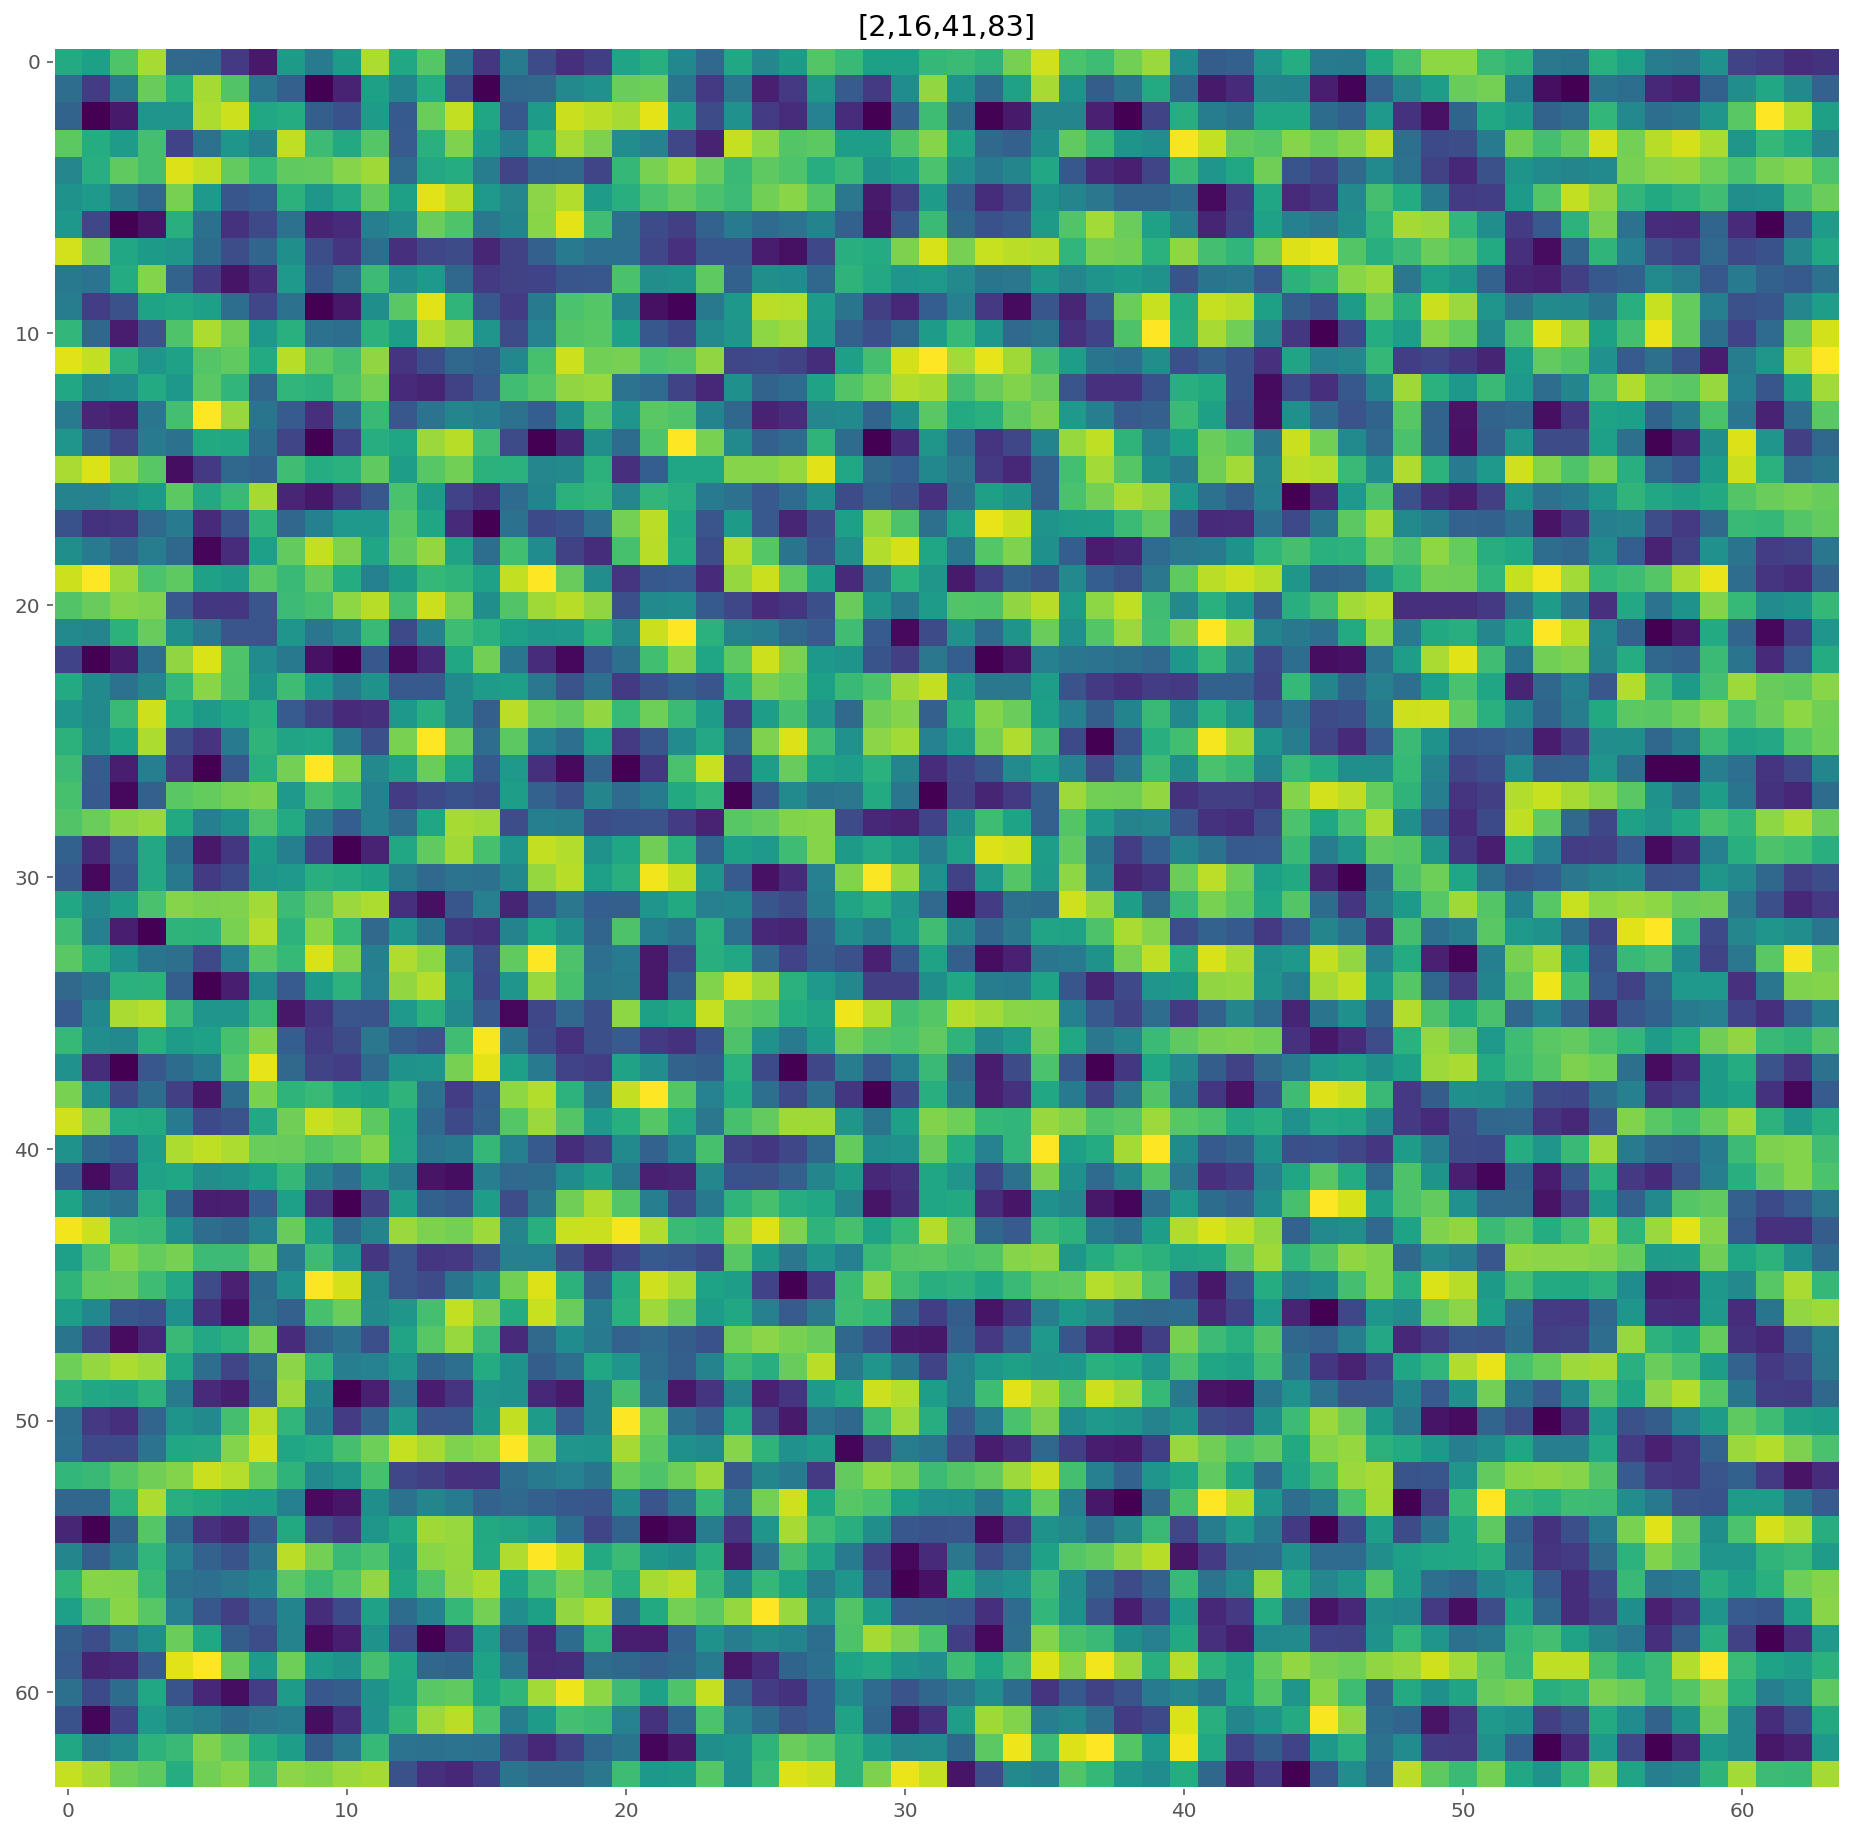

In [185]:
# redefine model to output right after the first hidden layer
#finalized method to show the activations map at 2,16,41,83
ixs = [2,16,41,83]
outputs = [model.layers[i].output for i in ixs]

modelA_others = Model(inputs=model.inputs, outputs=outputs)

feature_maps = modelA_others.predict(img_tensor_expanded)

images_per_row = 16
counterActMap = 0 

for fmap in feature_maps:        
    n_features = fmap.shape[-1]                               

    size = fmap.shape[1]                                      

    n_cols = n_features // images_per_row                                 
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):                                             
        for row in range(images_per_row):
            channel_image = fmap[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()                         
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,                   
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    #plt.title('X')
    plt.title('[2,16,41,83]')
    plt.grid(False)

    #plt.savefig('Cat_FIRST_8_Layers_'+layer_name+'.png')
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    #plt.savefig('ModelB_PARTt002_'+nowTimeStampYYYYMMDDHHMMSS+'_collectionOfFeatureMaps_'+str(counterActMap+1)+'_.png')
    counterActMap = counterActMap + 1   

In [ ]:
## heatmap I 

In [ ]:
def deprocess_image(x):
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x  

In [190]:
x = img_tensor_expanded

## Optional: See a heatmap over the last activation layer - this tells us what the model is using to classify as 'cat'

The base idea is also discussed at 'Visualizing heatmaps of class activation" in Deep Learning with Python (Francois Chollet)
" This general category of techniques is called class activation map (CAM) visualization, and it consists of producing heatmaps of class activation over input images."


adopted from https://keras.io/examples/vision/grad_cam/

In [186]:
import matplotlib.cm as cm

In [187]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

In [188]:
#refer to this https://keras.io/examples/vision/grad_cam/ for example to get a heatmap 
# prerequsite : the model must ahve ung_eagarly=true when compiled 

def make_gradcam_heatmap02 (img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # print ('hi there')
    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [191]:
#exected 1,32,32,3 - since we have expanded one element 
print (x.shape)

(1, 32, 32, 3)


In [192]:
# look at the model summary 
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization_48 (BatchN  (None, 32, 32, 3)   12          ['input_4[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv2d_49 (Conv2D)             (None, 32, 32, 32)   896         ['batch_normalization_48[0][0]'] 
                                                                                                  
 re_lu_43 (ReLU)                (None, 32, 32, 32)   0           ['conv2d_49[0][0]']        

In [ ]:
from IPython.display import Image, display

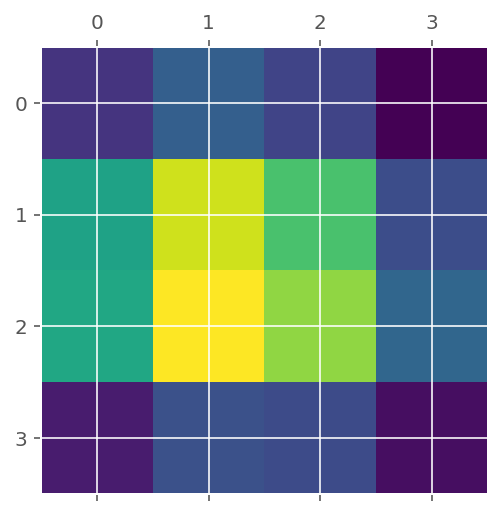

In [193]:
#troubleshoot -- there seems to be a problem if we did not use eagerly=true in the original model 
#https://stackoverflow.com/questions/52357542/attributeerror-tensor-object-has-no-attribute-numpy
#LOOKATHIS

# tf.config.run_functions_eagerly(True) #not working
# try this ... model.compile(..., run_eagerly=True)> if the gradientTape complain when a .h5 imported, re-run with run_eagerly=True

#the last_conv_layer_name should be retrieved from the model.summary() from the latest model 

last_conv_layer_name = 'conv2d_72'
img_array = img_tensor_expanded 

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
#print (preds)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap02(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [194]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    ## img = keras.preprocessing.image.load_img(img_path)
    ## img = keras.preprocessing.image.img_to_array(img)
    
    img = img_path * 255 

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    
    # print (img.shape[1])
    # print (img.shape[0])
    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    # display(Image(cam_path))
    plt.imshow(superimposed_img)

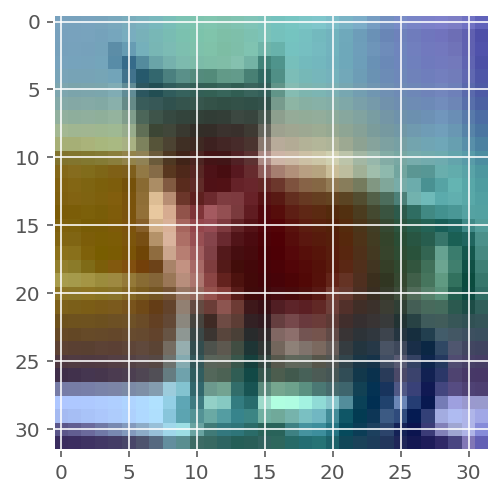

In [195]:
save_and_display_gradcam(img_tensor, heatmap) #XXX does not matter, cos we are using img_tensor

In [ ]:
##end heatmap I 

In [ ]:
## heatmap II - get a WRONGLY classify as cat and see the heat map 


Predicted  bird
True Label-->  cat


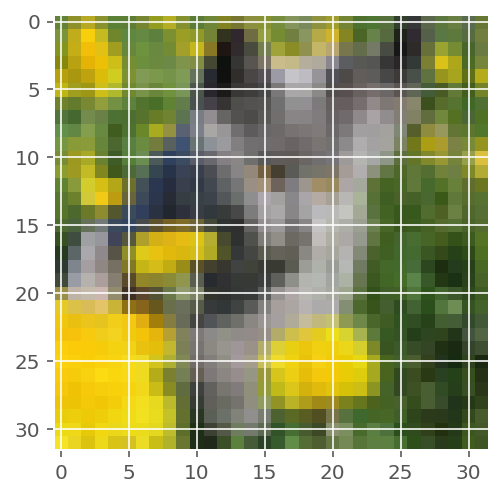

In [202]:
sample_wrong_classAs_cat_index = allCats_Wrong_Ind_arr[7]

img_tensor_wronglyClassAsCat = testX [ sample_wrong_classAs_cat_index ]

print ('Predicted ', labelNames [ output [ sample_wrong_classAs_cat_index ] ]  )
print ('True Label--> ', labelNames [ testyConverted [ sample_wrong_classAs_cat_index  ] ] )
plt.imshow(img_tensor_wronglyClassAsCat)
plt.show()


In [ ]:
#len(allCats_Wrong_Ind_arr)
# allCats_Wrong_Ind_arr

In [203]:
#img_tensor_wrongNotAsCat = img_tensor_wronglyClassAsCat
img_tensor_wrongNotAsCat_expanded = np.expand_dims(img_tensor_wronglyClassAsCat, axis=0)
# img_tensor_expanded = np.expand_dims(img_tensor, axis=0)

[[1.9935109e-05 1.5662758e-05 9.1335541e-01 3.6241867e-02 5.4903356e-03
  3.7648950e-02 4.4071847e-03 2.7625707e-03 1.9483212e-05 3.8600203e-05]]


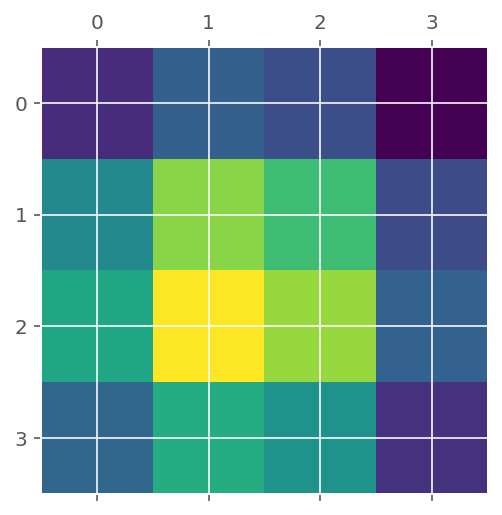

In [204]:

last_conv_layer_name = 'conv2d_72'
img_array = img_tensor_wrongNotAsCat_expanded 

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print (preds)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap02(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

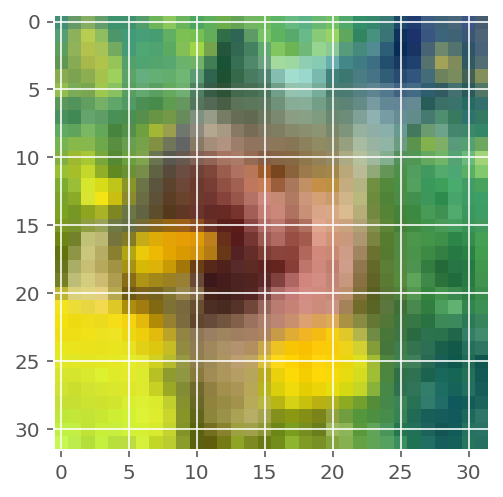

In [206]:
save_and_display_gradcam(img_tensor_wronglyClassAsCat, heatmap) #XXX does not matter, cos we are using img_tensor

In [ ]:
## heatmap II - get a WRONGLY classify as cat and see the heat map 

In [ ]:
##heatmap III

In [207]:
labelNames

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

There are  787  right predictions for bird


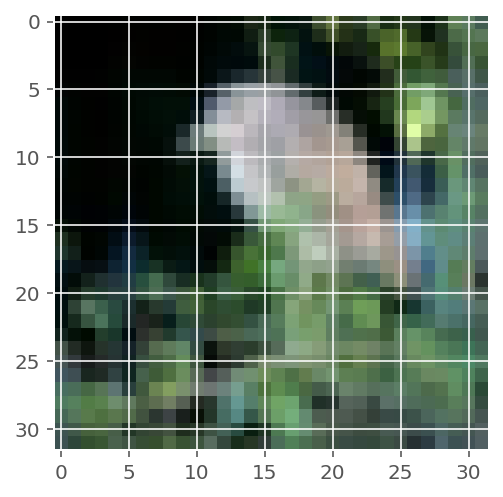

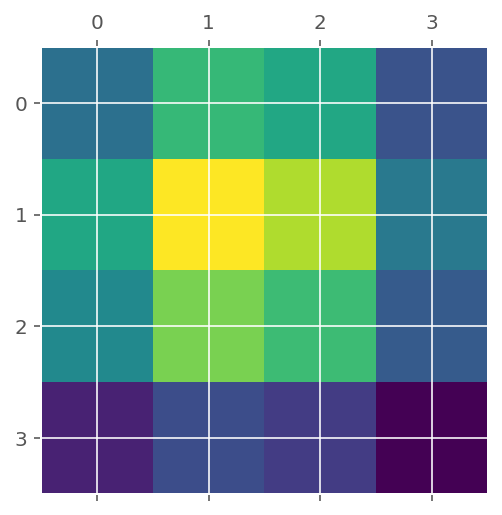

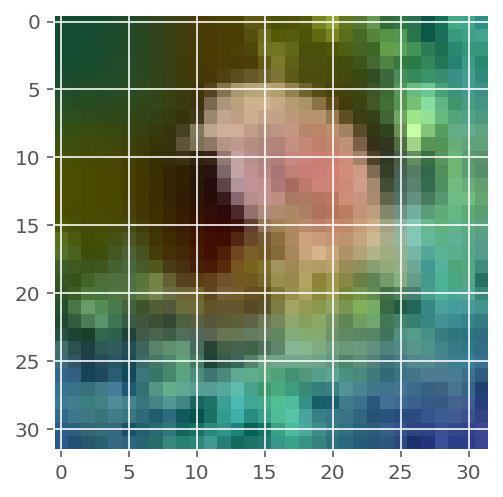

In [209]:

#testyConverted=labels
b=0
index_Of_label_to_check = 2
# cat => index 3 
#bird = ndex 2 

allBirds_Correct_Ind= [] 

for i in range (len(testyConverted)):
    #print (i)
    if (testyConverted[i]==index_Of_label_to_check and output[i]==index_Of_label_to_check ):
        #print (b) 
        b=b+1
        allBirds_Correct_Ind.append(i)

print ('There are ',b, ' right predictions for', labelNames [ index_Of_label_to_check ] ) 
#print (len(testyConverted))
#print (len(output))

sample_correct_bird_index = allBirds_Correct_Ind[35]  ##was 1 

img_tensor_correctBird = testX [allBirds_Correct_Ind[sample_correct_bird_index ]]
plt.imshow(img_tensor_correctBird)
plt.show()


img_tensor_correctBird_expanded = np.expand_dims(img_tensor_correctBird, axis=0)
img_tensor_correctBird_expanded.shape

last_conv_layer_name = 'conv2d_72'
img_array = img_tensor_correctBird_expanded 

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
#print (preds)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap02(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

save_and_display_gradcam(img_tensor_correctBird, heatmap) 

In [ ]:
##heatmap III

In [ ]:
#francios

## Optional : Try out the different barcharts of different predictions

In [ ]:
#load back the .h5 to speed things up 
#model = tf.keras.models.load_model( 'model_20211126_afterBN_epoch60_ESAccuracy_Leaky_Eagerly_fin.h5', custom_objects=None, 
#                                   compile=True, options=None )

predict_x = model.predict(testX) 
output = np.argmax(predict_x,axis=1)
#print(output)
testyConverted = np.argmax(testy,axis=1)

In [ ]:

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    labels = load_label_names()
    plt.imshow(img, cmap=plt.cm.binary)
    #corrections to function 
    #predicted_label = np.argmax(predictions_array)
    predicted_label = predictions_array


    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    #print ('[plot_image]] AT', i, '--predicted: ', predicted_label, '--labelled', true_label  )

    #plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
    #           color=color)
    plt.xlabel(f"P:{labels[int(predicted_label)]} - L:({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    #thisplot = plt.bar(range(10), predictions_array, color="#ffffff")
    #set all the height to 1 first 
    thisplot = plt.bar(range(10), 1, color="#ffffff")
    plt.ylim([0, 1])
    predicted_label = predictions_array
    #print ('plot vauearray [predicted_label] AT', i, '--predicted: ', predicted_label, '--labelled', true_label  )


    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    #ax.set_facecolor('white')

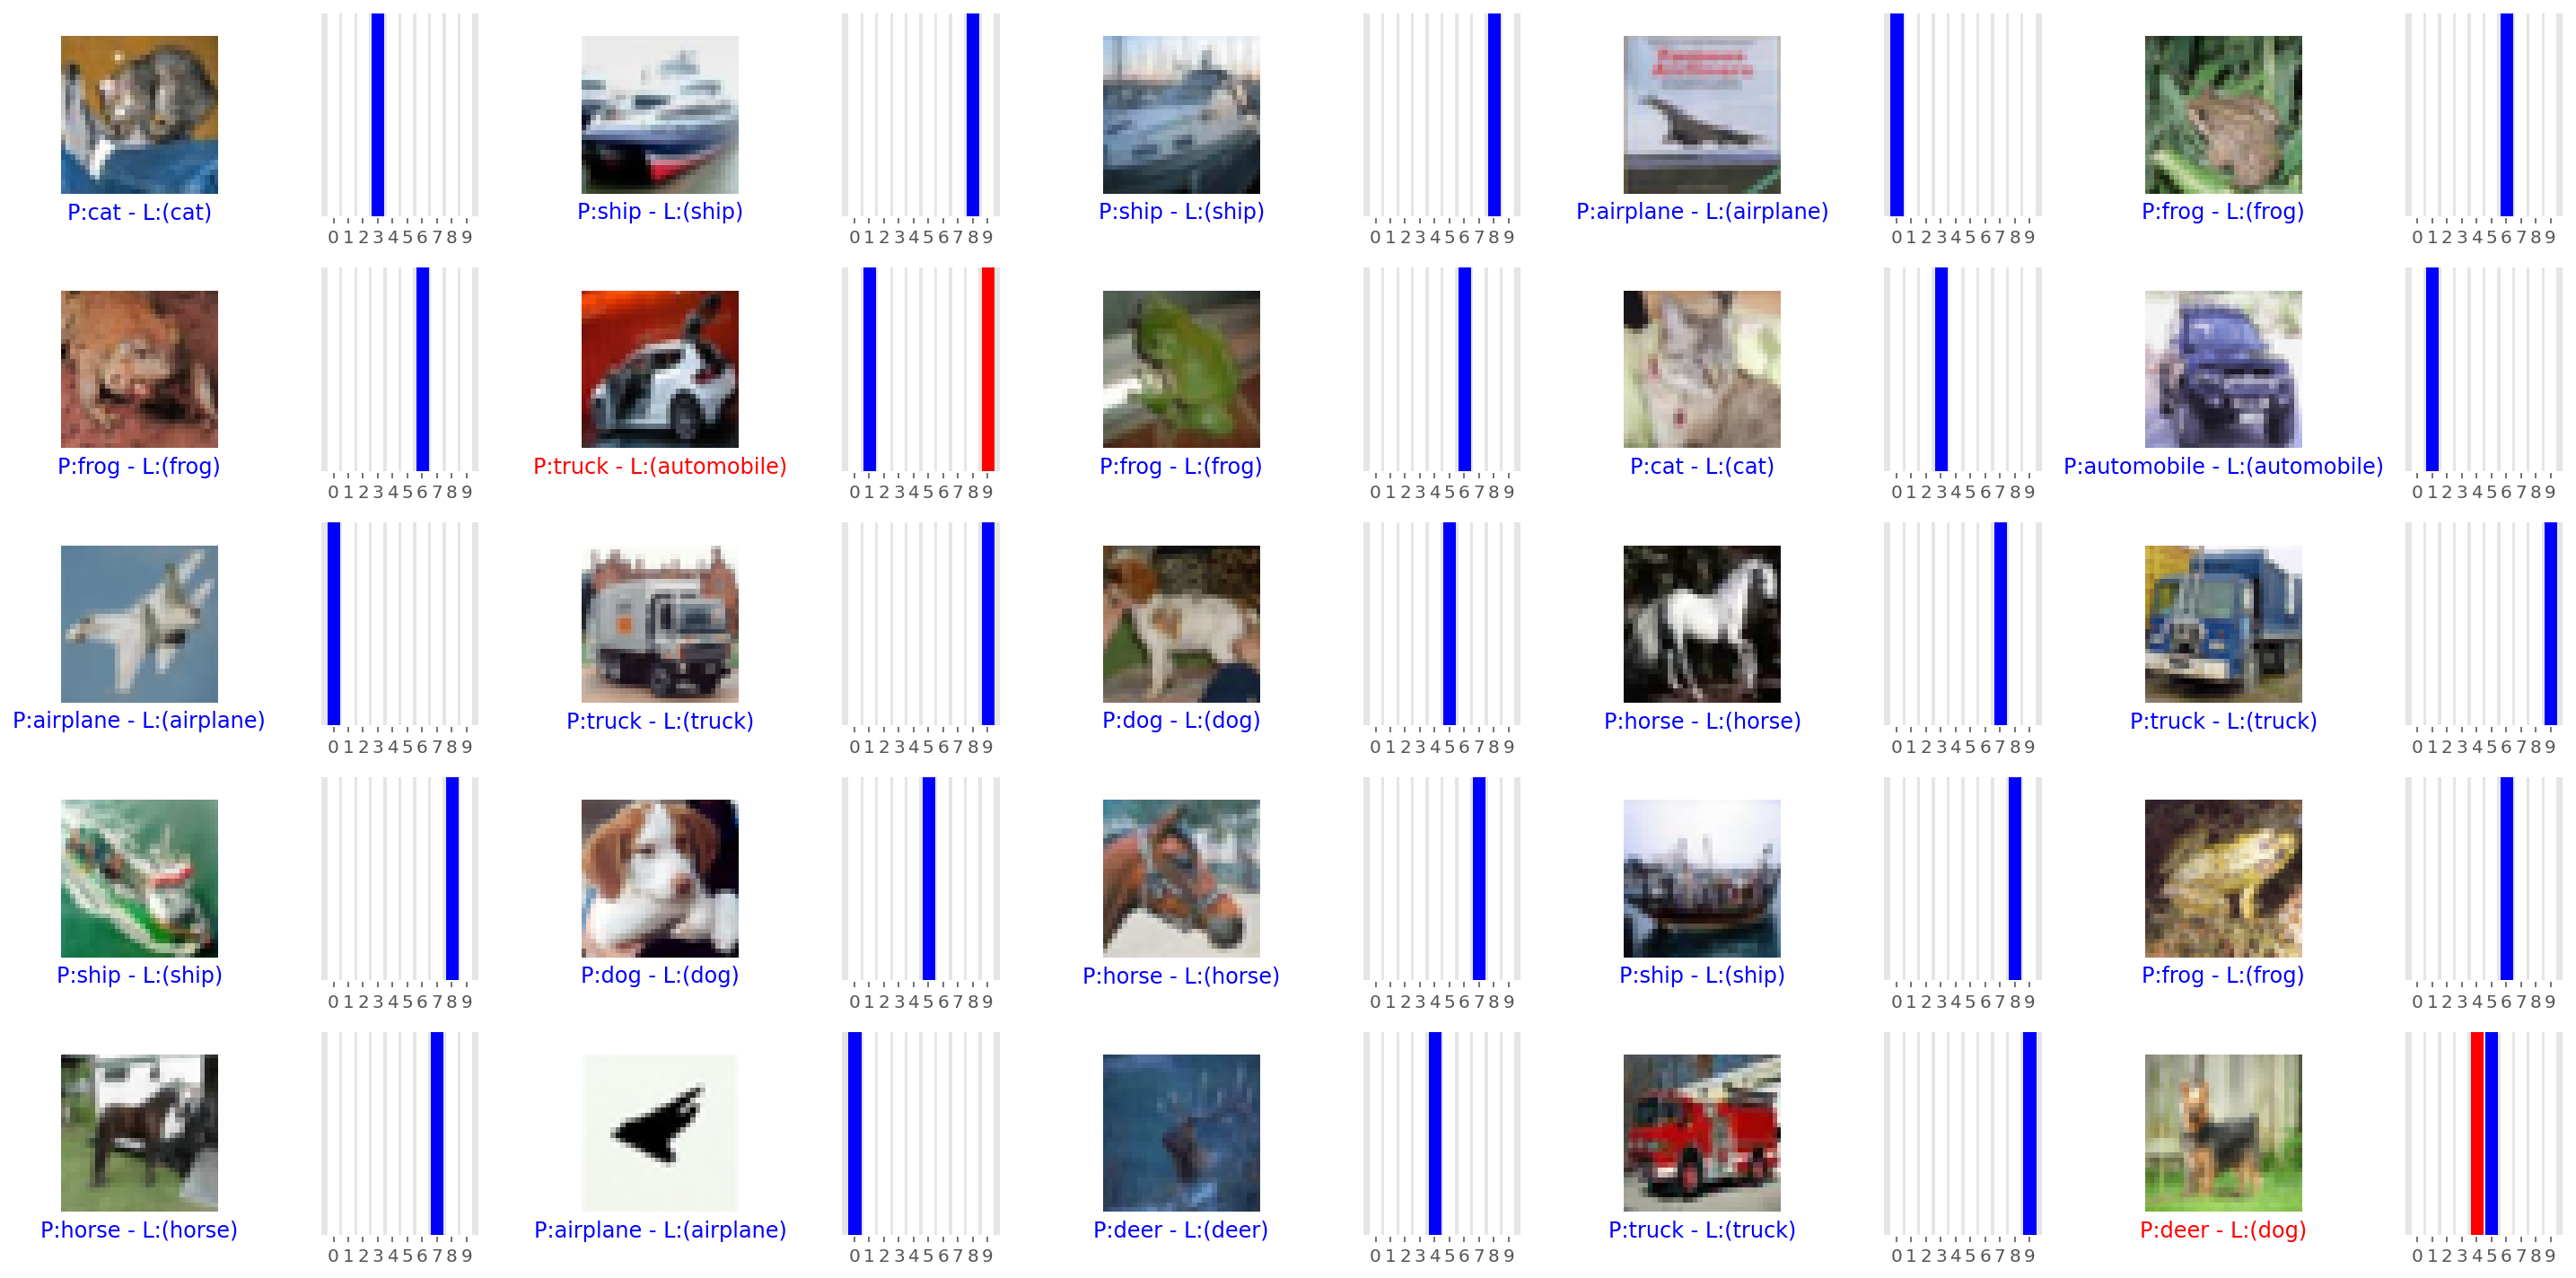

In [ ]:
##kaggle entry [ Optional not really working well - might be deleted ]
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    #plot_image(i, predictions[i], y_test, X_test)

    plot_image(i, output[i], testyConverted, testX)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    #plot_value_array(i, predictions[i], y_test)
    plot_value_array(i, output[i], testyConverted)
plt.tight_layout()
#LOOKATME

nowTimeStampYYYYMMDDHHMMSS = time.strftime("%Y%m%d"+'_'+ "%H%M%S" )
plt.savefig('ModelB_'+nowTimeStampYYYYMMDDHHMMSS+'_allMapsSimpleClass_.png')


plt.show()



In [ ]:
#optional, we check distribution of labels in testing dataset 

In [ ]:
def peekIntoTestY():

    labels = testyConverted
    

    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    
    print (label_counts)

    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))


In [ ]:
peekIntoTestY()

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
Label Counts of [0](AIRPLANE) : 1000
Label Counts of [1](AUTOMOBILE) : 1000
Label Counts of [2](BIRD) : 1000
Label Counts of [3](CAT) : 1000
Label Counts of [4](DEER) : 1000
Label Counts of [5](DOG) : 1000
Label Counts of [6](FROG) : 1000
Label Counts of [7](HORSE) : 1000
Label Counts of [8](SHIP) : 1000
Label Counts of [9](TRUCK) : 1000


In [ ]:
#end optional, we check distribution of labels in testing dataset 

## End (Optional) Getting a heatmap 